# Proyek Analisis Data: Nama dataset
- Nama: Kurniati Laeli Munifah
- Email: k.laelimunifah@gmail.com
- Id Dicoding: klmunifah

## Menentukan Pertanyaan Bisnis

- Bagaimana trend polusi udara di kota Aotizhongxin?
- Bagaimana trend perubahan suhu dan tekanan udara di Aotizhongxin?
- Bagaimana pengaruh tingkat polusi udara dengan perubahan suhu dan tekanan di Aotizhongxin?
- Pada rentang waktu apa tingkat partikel yang ada di udara di kota Aotizhongxin cenderung tinggi?
- Bagaimana kecenderungan arah angin di kota Aotizhongxin?
- Bagaimana perubahan kecepatan angin di kota Aotizhongxin?

## Menyiapkan semua library yang dibuthkan

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

Proses gathering dimulai dengan membuat data aoti_df yang menampilkan data yang berasal dari file (.csv) data sumber

In [13]:
# Membuat data tabel aoti_df
aoti_df = pd.read_csv("https://raw.githubusercontent.com/klaelimunifah/Proyek-Analisis-Data---Kurniati-L-M/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aoti_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

### Assessing Data

Assessing data dilakukan dengan mencari informasi mengenai data berupa tiap tipe data masing-masing variabel.

In [14]:
aoti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Selanjutnya dilakukan pencarian variabel yang tidak memiliki nilai di dalamnya. Terdapat beberapa variabel yang tidak memiliki nilai seperti pada hasil berikut.

In [15]:
aoti_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Lalu dilakukan perhitungan jumlah duplikasi, ditemukan bahwa tidak ada data yang terduplikasi.


In [16]:
print("Jumlah duplikasi: ", aoti_df.duplicated().sum())

Jumlah duplikasi:  0


Selanjutnya dilakukan penentuan parameter statistik dari masing-masing data

In [17]:
aoti_df.describe()           # menampilkan ringkasan parameter statistik (mean, median, dll.)

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

### Cleaning Data

Proses pembersihan data yang pertama adalah menghilangkan kolom variabel station. Hal ini dilakukan karena data yang digunakan hanya data dari stasiun Aotizhongxin sehingga kolom tersebut tidak diperlukan.

In [18]:
aoti_df = aoti_df.drop(columns = {'station'})
aoti_df.head(5)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM  
0  1023.0 -18.8   0.0  NNW   4.4  
1  1023.2 -18.2   0.0    N   4.7  
2  1023.5 -18.2   0.0  NNW   5.6  
3  1024.5 -19.4   0.0   NW   3.1  
4  1025.2 -19.5   0.0    N   2.0

Selanjutnya dilakukan pengisian parameter variable yang kosong seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, DEWP, RAIN, wd, WSPM.
variable yang kosong ini diasumsikan merupakan variable yang sulit mengalami perubahan secara mendadak sehingga dapat diasumsikan nilainya sama dengan nilai sebelumnya

In [19]:
# Pengisian data elemen yang kosong
aoti_df.fillna(method = "ffill", inplace=True)

In [20]:
# Pengecekan elemen variable yang kosong kembali
aoti_df.isna().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

## Exploratory Data Analysis (EDA)

### Tingkat polusi udara di Aotizhongxin
*   Selama 20 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
*   Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
*   Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
*   Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)

In [35]:
# Tingkat polusi udara selama 19 jam tanggal 2013-03-01 00.00-19.00
air_polution_hour = aoti_df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
air_polution_hour = air_polution_hour.reset_index()
air_polution_hour['time'] = air_polution_hour["hour"].astype(str) + ":00"
air_polution_hour.head(20)

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3   time
0   2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   0:00
1   2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   1:00
2   2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   2:00
3   2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   3:00
4   2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   4:00
5   2013      3    1     5    5.0   5.0  18.0  18.0  400.0  66.0   5:00
6   2013      3    1     6    3.0   3.0  18.0  32.0  500.0  50.0   6:00
7   2013      3    1     7    3.0   6.0  19.0  41.0  500.0  43.0   7:00
8   2013      3    1     8    3.0   6.0  16.0  43.0  500.0  45.0   8:00
9   2013      3    1     9    3.0   8.0  12.0  28.0  400.0  59.0   9:00
10  2013      3    1    10    3.0   6.0   9.0  12.0  400.0  72.0  10:00
11  2013      3    1    11    3.0   6.0   9.0  14.0  400.0  71.0  11:00
12  2013      3    1    12    3.0   6.0   7.0  13.0  300.0  74.0  12:00
13  2013      3    1    13    3.0   6.0   7.0  12.0  400.0  76.0  13:00
14  2013      3    1    14    6.0   9.0   7.0  11.0  400.0  77.0  14:00
15  2013      3    1    15    8.0  15.0   7.0  14.0  400.0  76.0  15:00
16  2013      3    1    16    9.0  19.0   9.0  13.0  400.0  76.0  16:00
17  2013      3    1    17   10.0  23.0  11.0  15.0  400.0  74.0  17:00
18  2013      3    1    18   11.0  20.0   8.0  20.0  500.0  70.0  18:00
19  2013      3    1    19    8.0  14.0  12.0  30.0  500.0  60.0  19:00

In [36]:
# Tingkat polusi selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
air_polution_day = aoti_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
air_polution_day = air_polution_day.reset_index()
air_polution_day['time'] = air_polution_day["year"].astype(str) + "-" + air_polution_day["month"].astype(str) + "-" + air_polution_day["day"].astype(str)
air_polution_day.head(10)

year  month  day       PM2.5        PM10         SO2         NO2  \
0  2013      3    1    7.125000   10.750000   11.708333   22.583333   
1  2013      3    2   30.750000   42.083333   36.625000   66.666667   
2  2013      3    3   76.916667  120.541667   61.291667   81.000000   
3  2013      3    4   22.708333   44.583333   23.541667   45.500000   
4  2013      3    5  148.875000  183.791667   93.875000  132.833333   
5  2013      3    6  223.250000  265.166667  116.236700  142.059383   
6  2013      3    7  263.375000  316.083333   97.541667  147.750000   
7  2013      3    8  221.458333  297.958333   69.456233  120.301121   
8  2013      3    9   62.041667  226.750000   33.333333   45.000000   
9  2013      3   10   34.291667   68.916667   22.916667   49.666667   

            CO         O3       time  
0   429.166667  63.875000   2013-3-1  
1   824.916667  29.750000   2013-3-2  
2  1620.625000  19.125000   2013-3-3  
3   604.166667  53.750000   2013-3-4  
4  2357.958333  68.458333   2013-3-5  
5  3087.166667  19.750000   2013-3-6  
6  3632.875000  38.833333   2013-3-7  
7  2745.458333  79.333333   2013-3-8  
8  1178.958333  73.916667   2013-3-9  
9   708.333333  82.666667  2013-3-10

In [25]:
# Tingkat polusi selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
air_polution_month = aoti_df.groupby(by = ['year', 'month'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
air_polution_month = air_polution_month.reset_index()
air_polution_month['time'] = air_polution_month["year"].astype(str) + "-" + air_polution_month["month"].astype(str)
air_polution_month.head(10)

year  month       PM2.5        PM10        SO2        NO2           CO  \
0  2013      3  110.092742  144.595430  45.022353  74.801952  1481.291667   
1  2013      4   62.751389  108.204167  24.759840  53.594429   910.220833   
2  2013      5   85.763441  140.778226  30.442204  61.016129   868.098118   
3  2013      6  106.245833  128.716667  14.677878  72.845117  1040.580556   
4  2013      7   68.911290   85.227151   9.286576  55.106726   821.360215   
5  2013      8   62.325269   84.455645   6.915173  56.796661   767.338710   
6  2013      9   79.390278  104.841667  13.816619  63.869487  1063.744444   
7  2013     10   95.331989  120.086022  22.425482  73.605892  1096.639785   
8  2013     11   77.283333  105.633333  25.961111  59.951389  1463.611111   
9  2013     12   76.706989  106.676075  41.908145  62.143112  1874.731183   

          O3     time  
0  46.822122   2013-3  
1  48.171438   2013-4  
2  72.946330   2013-5  
3  68.813971   2013-6  
4  71.190384   2013-7  
5  70.400221   2013-8  
6  37.196265   2013-9  
7  20.173421  2013-10  
8  18.898694  2013-11  
9  14.952130  2013-12

In [26]:
# Tingkat polusi selama 5 tahun hari pada tanggal 2013 sampai 2017 (5 data pertama)
air_polution_year = aoti_df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year'], ascending = True)
air_polution_year = air_polution_year.reset_index()
air_polution_year['time'] = air_polution_year["year"].astype(str)
air_polution_year.head(10)

year      PM2.5        PM10        SO2        NO2           CO         O3  \
0  2013  82.494145  112.935458  23.570135  63.383651  1139.012936  47.004686   
1  2014  91.413413  124.382226  21.975285  64.063002  1215.445205  48.112591   
2  2015  82.075548  112.158425  14.363904  60.968961  1438.047945  63.521689   
3  2016  74.773224   94.463001  10.844945  48.325364  1190.926685  62.016507   
4  2017  94.379944  106.987288  20.829802  66.182203  1665.254237  47.399718   

   time  
0  2013  
1  2014  
2  2015  
3  2016  
4  2017

###  Suhu dan tekanan udara di Aotizhongxin
*   Selama 20 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
*   Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
*   Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
*   Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)



In [44]:
# Suhu dan tekanan udara selama 19 jam tanggal 2013-03-01 00.00-19.00
air_parameters_hour = aoti_df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
air_parameters_hour = air_parameters_hour.reset_index()
air_parameters_hour['time'] = air_parameters_hour["hour"].astype(str) + ":00"
air_parameters_hour.head(20)

year  month  day  hour  TEMP    PRES   time
0   2013      3    1     0  -0.7  1023.0   0:00
1   2013      3    1     1  -1.1  1023.2   1:00
2   2013      3    1     2  -1.1  1023.5   2:00
3   2013      3    1     3  -1.4  1024.5   3:00
4   2013      3    1     4  -2.0  1025.2   4:00
5   2013      3    1     5  -2.2  1025.6   5:00
6   2013      3    1     6  -2.6  1026.5   6:00
7   2013      3    1     7  -1.6  1027.4   7:00
8   2013      3    1     8   0.1  1028.3   8:00
9   2013      3    1     9   1.2  1028.5   9:00
10  2013      3    1    10   1.9  1028.2  10:00
11  2013      3    1    11   2.9  1028.2  11:00
12  2013      3    1    12   3.9  1027.3  12:00
13  2013      3    1    13   5.3  1026.2  13:00
14  2013      3    1    14   6.0  1025.9  14:00
15  2013      3    1    15   6.2  1025.7  15:00
16  2013      3    1    16   5.9  1025.6  16:00
17  2013      3    1    17   4.3  1026.3  17:00
18  2013      3    1    18   3.1  1027.4  18:00
19  2013      3    1    19   2.3  1028.3  19:00

In [47]:
# Suhu dan tekanan udara selama 10 hari tanggal 2013-03-01 sampai 2013-03-10
air_parameters_day = aoti_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
air_parameters_day = air_parameters_day.reset_index()
air_parameters_day['time'] = air_parameters_day["year"].astype(str) + "-" + air_parameters_day["month"].astype(str) + "-" + air_parameters_day["day"].astype(str)
air_parameters_day.head(10)

year  month  day      TEMP         PRES       time
0  2013      3    1  1.391667  1026.875000   2013-3-1
1  2013      3    2  0.616667  1026.850000   2013-3-2
2  2013      3    3  5.566667  1014.608333   2013-3-3
3  2013      3    4  9.962500  1017.650000   2013-3-4
4  2013      3    5  6.291667  1010.900000   2013-3-5
5  2013      3    6  7.183333  1007.483333   2013-3-6
6  2013      3    7  9.287500  1002.320833   2013-3-7
7  2013      3    8  9.612500   999.475000   2013-3-8
8  2013      3    9  6.983333  1004.391667   2013-3-9
9  2013      3   10  5.262500  1020.491667  2013-3-10

In [57]:
# Suhu dan tekanan udara selama 10 bulan tanggal 2013-03 sampai 2013-10
air_parameters_month = aoti_df.groupby(by = ['year', 'month']).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
air_parameters_month = air_parameters_month.reset_index()
air_parameters_month['time'] = air_parameters_month["year"].astype(str) + "-" + air_parameters_month["month"].astype(str)
air_parameters_month.head(10)

year  month       TEMP         PRES     time
0  2013      3   6.053629  1012.547446   2013-3
1  2013      4  12.260694  1008.296944   2013-4
2  2013      5  21.374194  1003.162231   2013-5
3  2013      6  23.386111  1000.165556   2013-6
4  2013      7  26.877419   996.033065   2013-7
5  2013      8  26.744355   999.316801   2013-8
6  2013      9  20.077778  1009.355139   2013-9
7  2013     10  12.809812  1016.268952  2013-10
8  2013     11   5.530972  1016.972083  2013-11
9  2013     12  -0.161290  1019.950000  2013-12

In [105]:
# Suhu dan tekanan udara selama 5 tahun tanggal 2013 sampai 2017
air_parameters_year = aoti_df.groupby(by = ['year'] ).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year'], ascending = True)
air_parameters_year = air_parameters_year.reset_index()
air_parameters_year['time'] = air_parameters_year["year"].astype(str)
air_parameters_year.head(5)

year       TEMP         PRES  time
0  2013  15.497740  1008.200408  2013
1  2014  13.878128  1011.318082  2014
2  2015  13.474733  1012.571714  2015
3  2016  13.873747  1012.821671  2016
4  2017   0.665657  1023.619056  2017

### Korelasi antara Tingkat Polusi dengan suhu dan tekanan udara
Pada eksplorasi ini dilakukan perhitungan korelasi dengan menggunakan metode korelasi pearson
Perubahan tingkat polusi PM2.5, PM10, SO2, NO2, CO, dan O3 akan dibandingkan dengan perubahan suhu dan tekanan udara

In [66]:
# Pengambilan dataframe untuk korelasi
correlation_df = aoti_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']].copy()
correlation_df

PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES
0        4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0
1        8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2
2        7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5
3        6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5
4        3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2
...      ...   ...   ...   ...    ...   ...   ...     ...
35059   12.0  29.0   5.0  35.0  400.0  95.0  12.5  1013.5
35060   13.0  37.0   7.0  45.0  500.0  81.0  11.6  1013.6
35061   16.0  37.0  10.0  66.0  700.0  58.0  10.8  1014.2
35062   21.0  44.0  12.0  87.0  700.0  35.0  10.5  1014.4
35063   19.0  31.0  10.0  79.0  600.0  42.0   8.6  1014.1

[35064 rows x 8 columns]

In [68]:
# Perhitungan korelasi pearson secara keseluruhan pada tingkat polusi VS suhu dan temperature
korelasi = correlation_df.corr(method = "pearson")
korelasi

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.872035  0.474893  0.675116  0.775057 -0.159296 -0.126029   
PM10   0.872035  1.000000  0.470235  0.647966  0.677782 -0.146384 -0.115481   
SO2    0.474893  0.470235  1.000000  0.429816  0.525074 -0.211762 -0.357749   
NO2    0.675116  0.647966  0.429816  1.000000  0.680973 -0.497371 -0.239960   
CO     0.775057  0.677782  0.525074  0.680973  1.000000 -0.324559 -0.371858   
O3    -0.159296 -0.146384 -0.211762 -0.497371 -0.324559  1.000000  0.591809   
TEMP  -0.126029 -0.115481 -0.357749 -0.239960 -0.371858  0.591809  1.000000   
PRES  -0.003174 -0.028574  0.211480  0.082465  0.223111 -0.424872 -0.827171   

           PRES  
PM2.5 -0.003174  
PM10  -0.028574  
SO2    0.211480  
NO2    0.082465  
CO     0.223111  
O3    -0.424872  
TEMP  -0.827171  
PRES   1.000000

In [70]:
# Perhitungan korelasi pearson untuk tingkat polusi dengan suhu dilakukan dengan fungsi berikut
def correlation_suhu(df):
    pm25_suhu = round(df['PM2.5'].corr(df['TEMP'], method ="pearson"),2)
    pm10_suhu = round(df['PM10'].corr(df['TEMP'], method ="pearson"),2)
    SO2_suhu = round(df['SO2'].corr(df['TEMP'], method ="pearson"),2)
    NO2_suhu = round(df['NO2'].corr(df['TEMP'], method ="pearson"),2)
    CO_suhu = round(df['CO'].corr(df['TEMP'], method ="pearson"),2)
    O3_suhu = round(df['O3'].corr(df['TEMP'], method ="pearson"),2)
    correlation_suhu = {'parameter': ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
                        'values' : [pm25_suhu, pm10_suhu, SO2_suhu, NO2_suhu, CO_suhu, O3_suhu]}
    correlation_suhu_df = pd.DataFrame(correlation_suhu)
    return correlation_suhu_df

In [72]:
korelasi_suhu = correlation_suhu(correlation_df)
korelasi_suhu

parameter  values
0     PM2.5   -0.13
1      PM10   -0.12
2       SO2   -0.36
3       NO2   -0.24
4        CO   -0.37
5        O3    0.59

In [73]:
# Perhitungan korelasi pearson untuk tingkat polusi dengan tekanan udara dilakukan dengan fungsi berikut
def correlation_pres(df):
    pm25_pres = round(df['PM2.5'].corr(df['PRES'], method ="pearson"),2)
    pm10_pres = round(df['PM10'].corr(df['PRES'], method ="pearson"),2)
    SO2_pres = round(df['SO2'].corr(df['PRES'], method ="pearson"),2)
    NO2_pres = round(df['NO2'].corr(df['PRES'], method ="pearson"),2)
    CO_pres = round(df['CO'].corr(df['PRES'], method ="pearson"),2)
    O3_pres = round(df['O3'].corr(df['PRES'], method ="pearson"),2)
    correlation_pres = {'parameter': ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
                        'values' : [pm25_pres, pm10_pres, SO2_pres, NO2_pres, CO_pres, O3_pres]}
    correlation_pres_df = pd.DataFrame(correlation_pres)
    return correlation_pres_df

In [74]:
korelasi_tekanan = correlation_pres(correlation_df)
korelasi_tekanan

parameter  values
0     PM2.5   -0.00
1      PM10   -0.03
2       SO2    0.21
3       NO2    0.08
4        CO    0.22
5        O3   -0.42

### Tingkat partikulat Matter PM2.5 dan PM10 berdasarkan rentang waktu
Pembagian rentang waktu dilakukan dengan acuan berikut

*   Morning = 06.00 - 11.00
*   Afternoon = 12.00 - 16.00
*   Evening = 17.00 - 23.00
*   Night = 00.00 - 05.00

dilakukan perhitungan nilai rata-rata PM2.5 dan PM10 berdasarkan rentang waktu tersebut.


In [77]:
# Penentuan rentang waktu dari masing-masing jam
aoti_df['time_span'] = aoti_df.hour.apply(lambda x: "Morning" if x >= 6 and x<=11
                                          else ("Afternoon" if x >= 12 and x<=16
                                                else ("Evening" if x >=17 and x<=23 else "Night")))
# Penggabungan berdasarkan rentang waktu
timespan_particle_df = aoti_df.groupby(by="time_span").agg({
        "hour" : "first",
        "PM2.5":"mean",
        "PM10" :"mean"
    })
timespan_particle_df['index'] = timespan_particle_df.hour.apply(lambda x: 0 if x >= 6 and x<=11
                                          else (1 if x >= 12 and x<=16
                                                else (2 if x >=17 and x<=23 else 3)))

timespan_particle_df= timespan_particle_df.sort_values(by = ['index'], ascending =True)
timespan_particle_df = timespan_particle_df.reset_index()
timespan_particle_df = timespan_particle_df.drop(columns={"index", "hour"})

timespan_particle_df

time_span      PM2.5        PM10
0    Morning  79.129660  102.196954
1  Afternoon  77.881492   99.624107
2    Evening  85.280991  120.884394
3      Night  89.129215  116.684212

### Persebaran arah angin di kota Aotizhongxin
dilakukan perhitungan seberapa sering angin berhembus ke arah tertentu


In [80]:
aoti_df["wind_direction"]= aoti_df["wd"]
wind_direction_df = aoti_df[['wind_direction', 'wd']].copy()
wind_direction_df = wind_direction_df.groupby(by="wind_direction").agg({"wd": "count"}).sort_values(by="wd", ascending=False).reset_index()
wind_direction_df = wind_direction_df.rename(columns = {'wd' : 'jumlah'})
wind_direction_df['percent'] = round((wind_direction_df['jumlah'] / wind_direction_df['jumlah'].sum()) * 100, 2)
wind_direction_df

wind_direction  jumlah  percent
0              NE    5161    14.72
1             ENE    3956    11.28
2              SW    3384     9.65
3               E    2611     7.45
4             NNE    2446     6.98
5             WSW    2213     6.31
6             SSW    2099     5.99
7               N    2069     5.90
8              NW    1865     5.32
9             ESE    1719     4.90
10            NNW    1589     4.53
11             SE    1349     3.85
12              S    1304     3.72
13              W    1175     3.35
14            WNW    1102     3.14
15            SSE    1022     2.91

### Kecepatan Angin di Aotizhongxin
*   Selama 20 jam pada tanggal 2013-03-01 00.00-19.00 (20 data pertama)
*   Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
*   Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)

In [82]:
# Kecepatan angin selama 19 jam tanggal 2013-03-01 00.00-19.00
wind_speed_hour = aoti_df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
wind_speed_hour = wind_speed_hour.reset_index()
wind_speed_hour['time'] = wind_speed_hour["hour"].astype(str) + ":00"
wind_speed_hour.head(20)

year  month  day  hour  WSPM   time
0   2013      3    1     0   4.4   0:00
1   2013      3    1     1   4.7   1:00
2   2013      3    1     2   5.6   2:00
3   2013      3    1     3   3.1   3:00
4   2013      3    1     4   2.0   4:00
5   2013      3    1     5   3.7   5:00
6   2013      3    1     6   2.5   6:00
7   2013      3    1     7   3.8   7:00
8   2013      3    1     8   4.1   8:00
9   2013      3    1     9   2.6   9:00
10  2013      3    1    10   3.6  10:00
11  2013      3    1    11   3.7  11:00
12  2013      3    1    12   5.1  12:00
13  2013      3    1    13   4.3  13:00
14  2013      3    1    14   4.4  14:00
15  2013      3    1    15   2.8  15:00
16  2013      3    1    16   3.9  16:00
17  2013      3    1    17   2.8  17:00
18  2013      3    1    18   2.1  18:00
19  2013      3    1    19   2.8  19:00

In [83]:
# Kecepatan angin selama 10 hari tanggal 2013-03-01 - 2013-03-10
wind_speed_day = aoti_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
wind_speed_day = wind_speed_day.reset_index()
wind_speed_day['time'] = wind_speed_day["year"].astype(str) + "-" + wind_speed_day["month"].astype(str) + "-" + wind_speed_day["day"].astype(str)
wind_speed_day.head(10)

year  month  day      WSPM       time
0  2013      3    1  3.254167   2013-3-1
1  2013      3    2  1.479167   2013-3-2
2  2013      3    3  1.658333   2013-3-3
3  2013      3    4  2.404167   2013-3-4
4  2013      3    5  1.129167   2013-3-5
5  2013      3    6  1.483333   2013-3-6
6  2013      3    7  1.558333   2013-3-7
7  2013      3    8  1.637500   2013-3-8
8  2013      3    9  3.391667   2013-3-9
9  2013      3   10  2.441667  2013-3-10

In [84]:
# Kecepatan angin selama 10 bulan tanggal 2013-03 - 201310
wind_speed_month = aoti_df.groupby(by = ['year', 'month'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
wind_speed_month = wind_speed_month.reset_index()
wind_speed_month['time'] = wind_speed_month["year"].astype(str) + "-" + wind_speed_month["month"].astype(str)
wind_speed_month.head(10)

year  month      WSPM     time
0  2013      3  2.000134   2013-3
1  2013      4  2.209722   2013-4
2  2013      5  1.740457   2013-5
3  2013      6  1.240000   2013-6
4  2013      7  1.278763   2013-7
5  2013      8  1.296909   2013-8
6  2013      9  1.134028   2013-9
7  2013     10  1.169624  2013-10
8  2013     11  1.633056  2013-11
9  2013     12  1.629973  2013-12

In [85]:
# Kecepatan angin selama 5 tahun tanggal 2013 - 2017
wind_speed_year= aoti_df.groupby(by = ['year'] ).agg({
            "WSPM" : "mean"}).sort_values(by = ['year'], ascending = True)
wind_speed_year = wind_speed_year.reset_index()
wind_speed_year['time'] = wind_speed_year["year"].astype(str)
wind_speed_year.head(5)

year      WSPM  time
0  2013  1.532993  2013
1  2014  1.476895  2014
2  2015  1.895342  2015
3  2016  1.859028  2016
4  2017  1.961158  2017

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend polusi udara di kota Aotizhongxin?


Pembuatan masing-masing grafik trend dilakukan dengan fungsi air_polution_graph(df).

Masing-masing dataframe air_polution_hour, air_polution_day, air_polutin_month, dan air_polution_year digunakan sebagai input. Ingat yang dimasukkan hanya sejumlah data awal sesuai pada tahapan eksplorasi.

In [93]:
def air_polution_graph(df):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    ax[0,0].plot(df['time'], df['PM2.5'], marker='o', linewidth=2, color="#39064B")
    ax[0,0].tick_params(axis='y', labelsize=20)
    ax[0,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,0].set_ylabel("PM2.5", fontsize=25)
    ax[0,0].set_title("PM2.5", loc="center", fontsize=35)

    ax[0,1].plot(df['time'], df['PM10'], marker='o', linewidth=2, color="#39064B")
    ax[0,1].tick_params(axis='y', labelsize=20)
    ax[0,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,1].set_ylabel("PM10", fontsize=25)
    ax[0,1].set_title("PM10", loc="center", fontsize=35)

    ax[1,0].plot(df['time'], df['SO2'], marker='o', linewidth=2, color="#39064B")
    ax[1,0].tick_params(axis='y', labelsize=20)
    ax[1,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,0].set_ylabel("SO2", fontsize=25)
    ax[1,0].set_title("SO2", loc="center", fontsize=35)

    ax[1,1].plot(df['time'], df['NO2'], marker='o', linewidth=2, color="#39064B")
    ax[1,1].tick_params(axis='y', labelsize=20)
    ax[1,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,1].set_ylabel("NO2", fontsize=25)
    ax[1,1].set_title("NO2", loc="center", fontsize=35)


    ax[2,0].plot(df['time'], df['CO'], marker='o', linewidth=2, color="#39064B")
    ax[2,0].tick_params(axis='y', labelsize=20)
    ax[2,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,0].set_ylabel("CO", fontsize=25)
    ax[2,0].set_title("CO", loc="center", fontsize=35)


    ax[2,1].plot(df['time'], df['O3'], marker='o', linewidth=2, color="#39064B")
    ax[2,1].tick_params(axis='y', labelsize=20)
    ax[2,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,1].set_ylabel("O3", fontsize=25)
    ax[2,1].set_title("O3", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Tingkat Polusi Udara di Aotizhongxin", fontsize=45, y=1.05)
    plt.show()


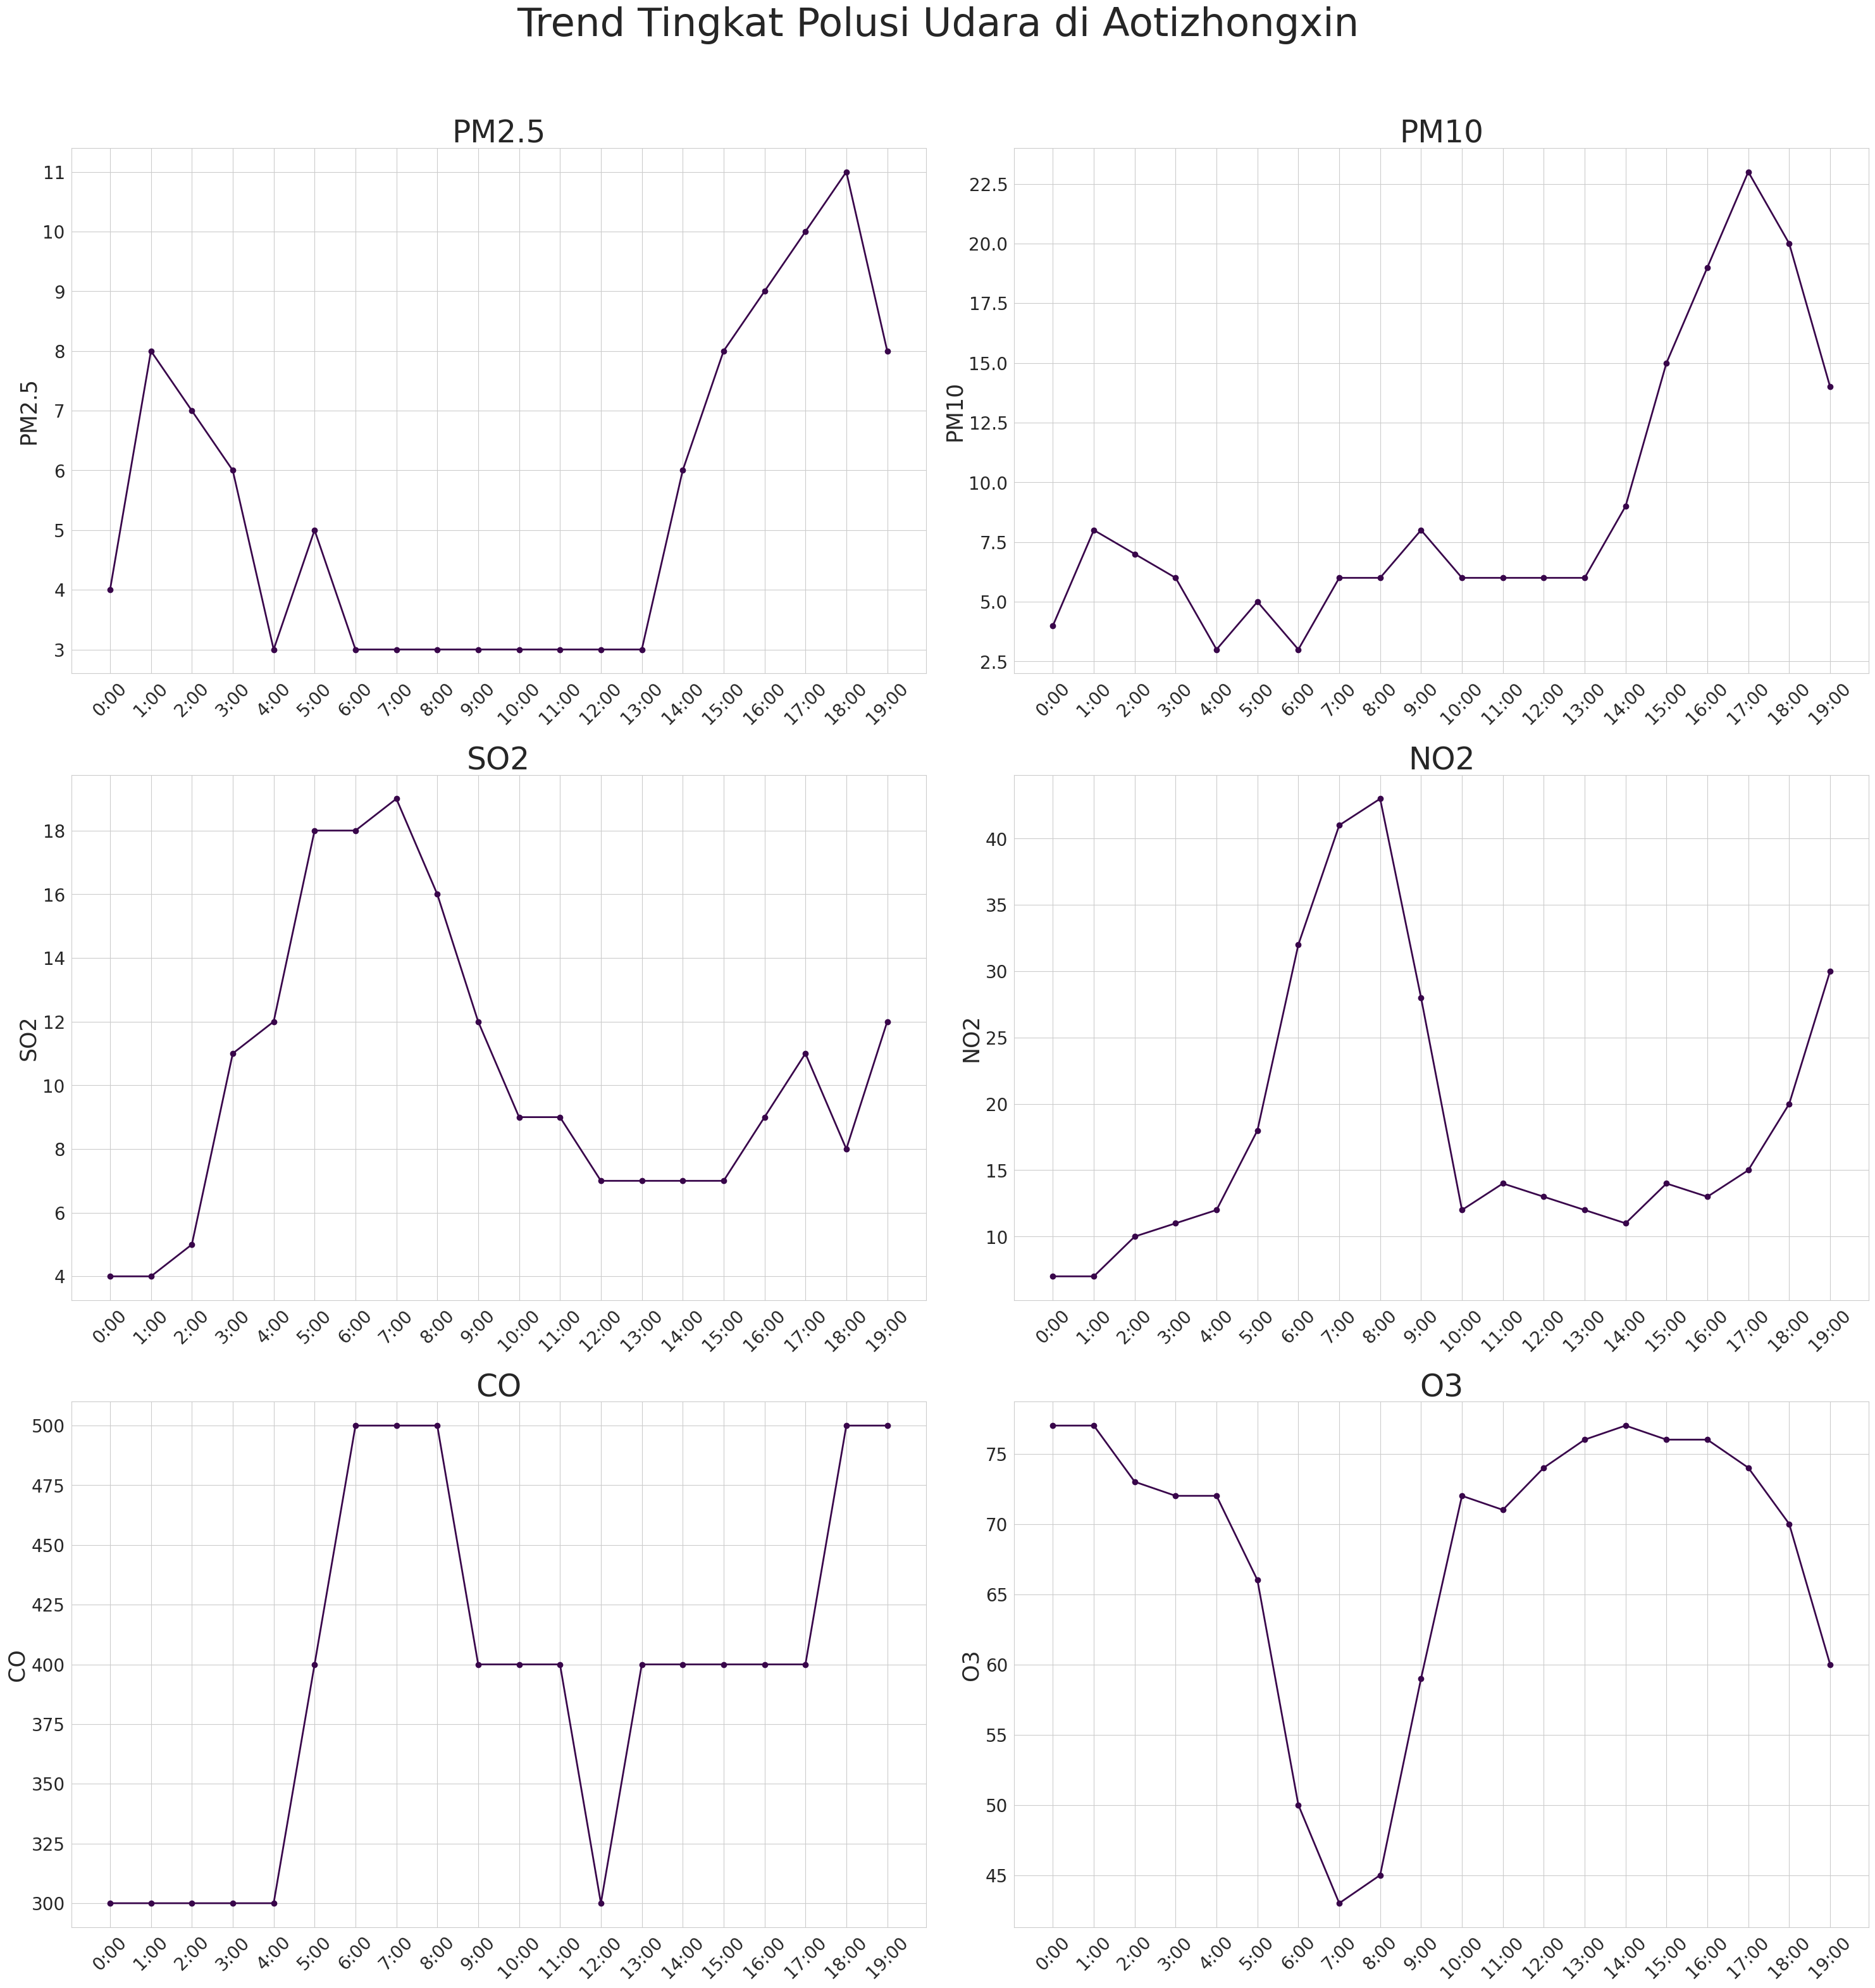

In [94]:
# Menampilkan grafik trend polusi 2013-03-01 pukul 00.00-19.00
air_polution_graph(air_polution_hour.head(20))

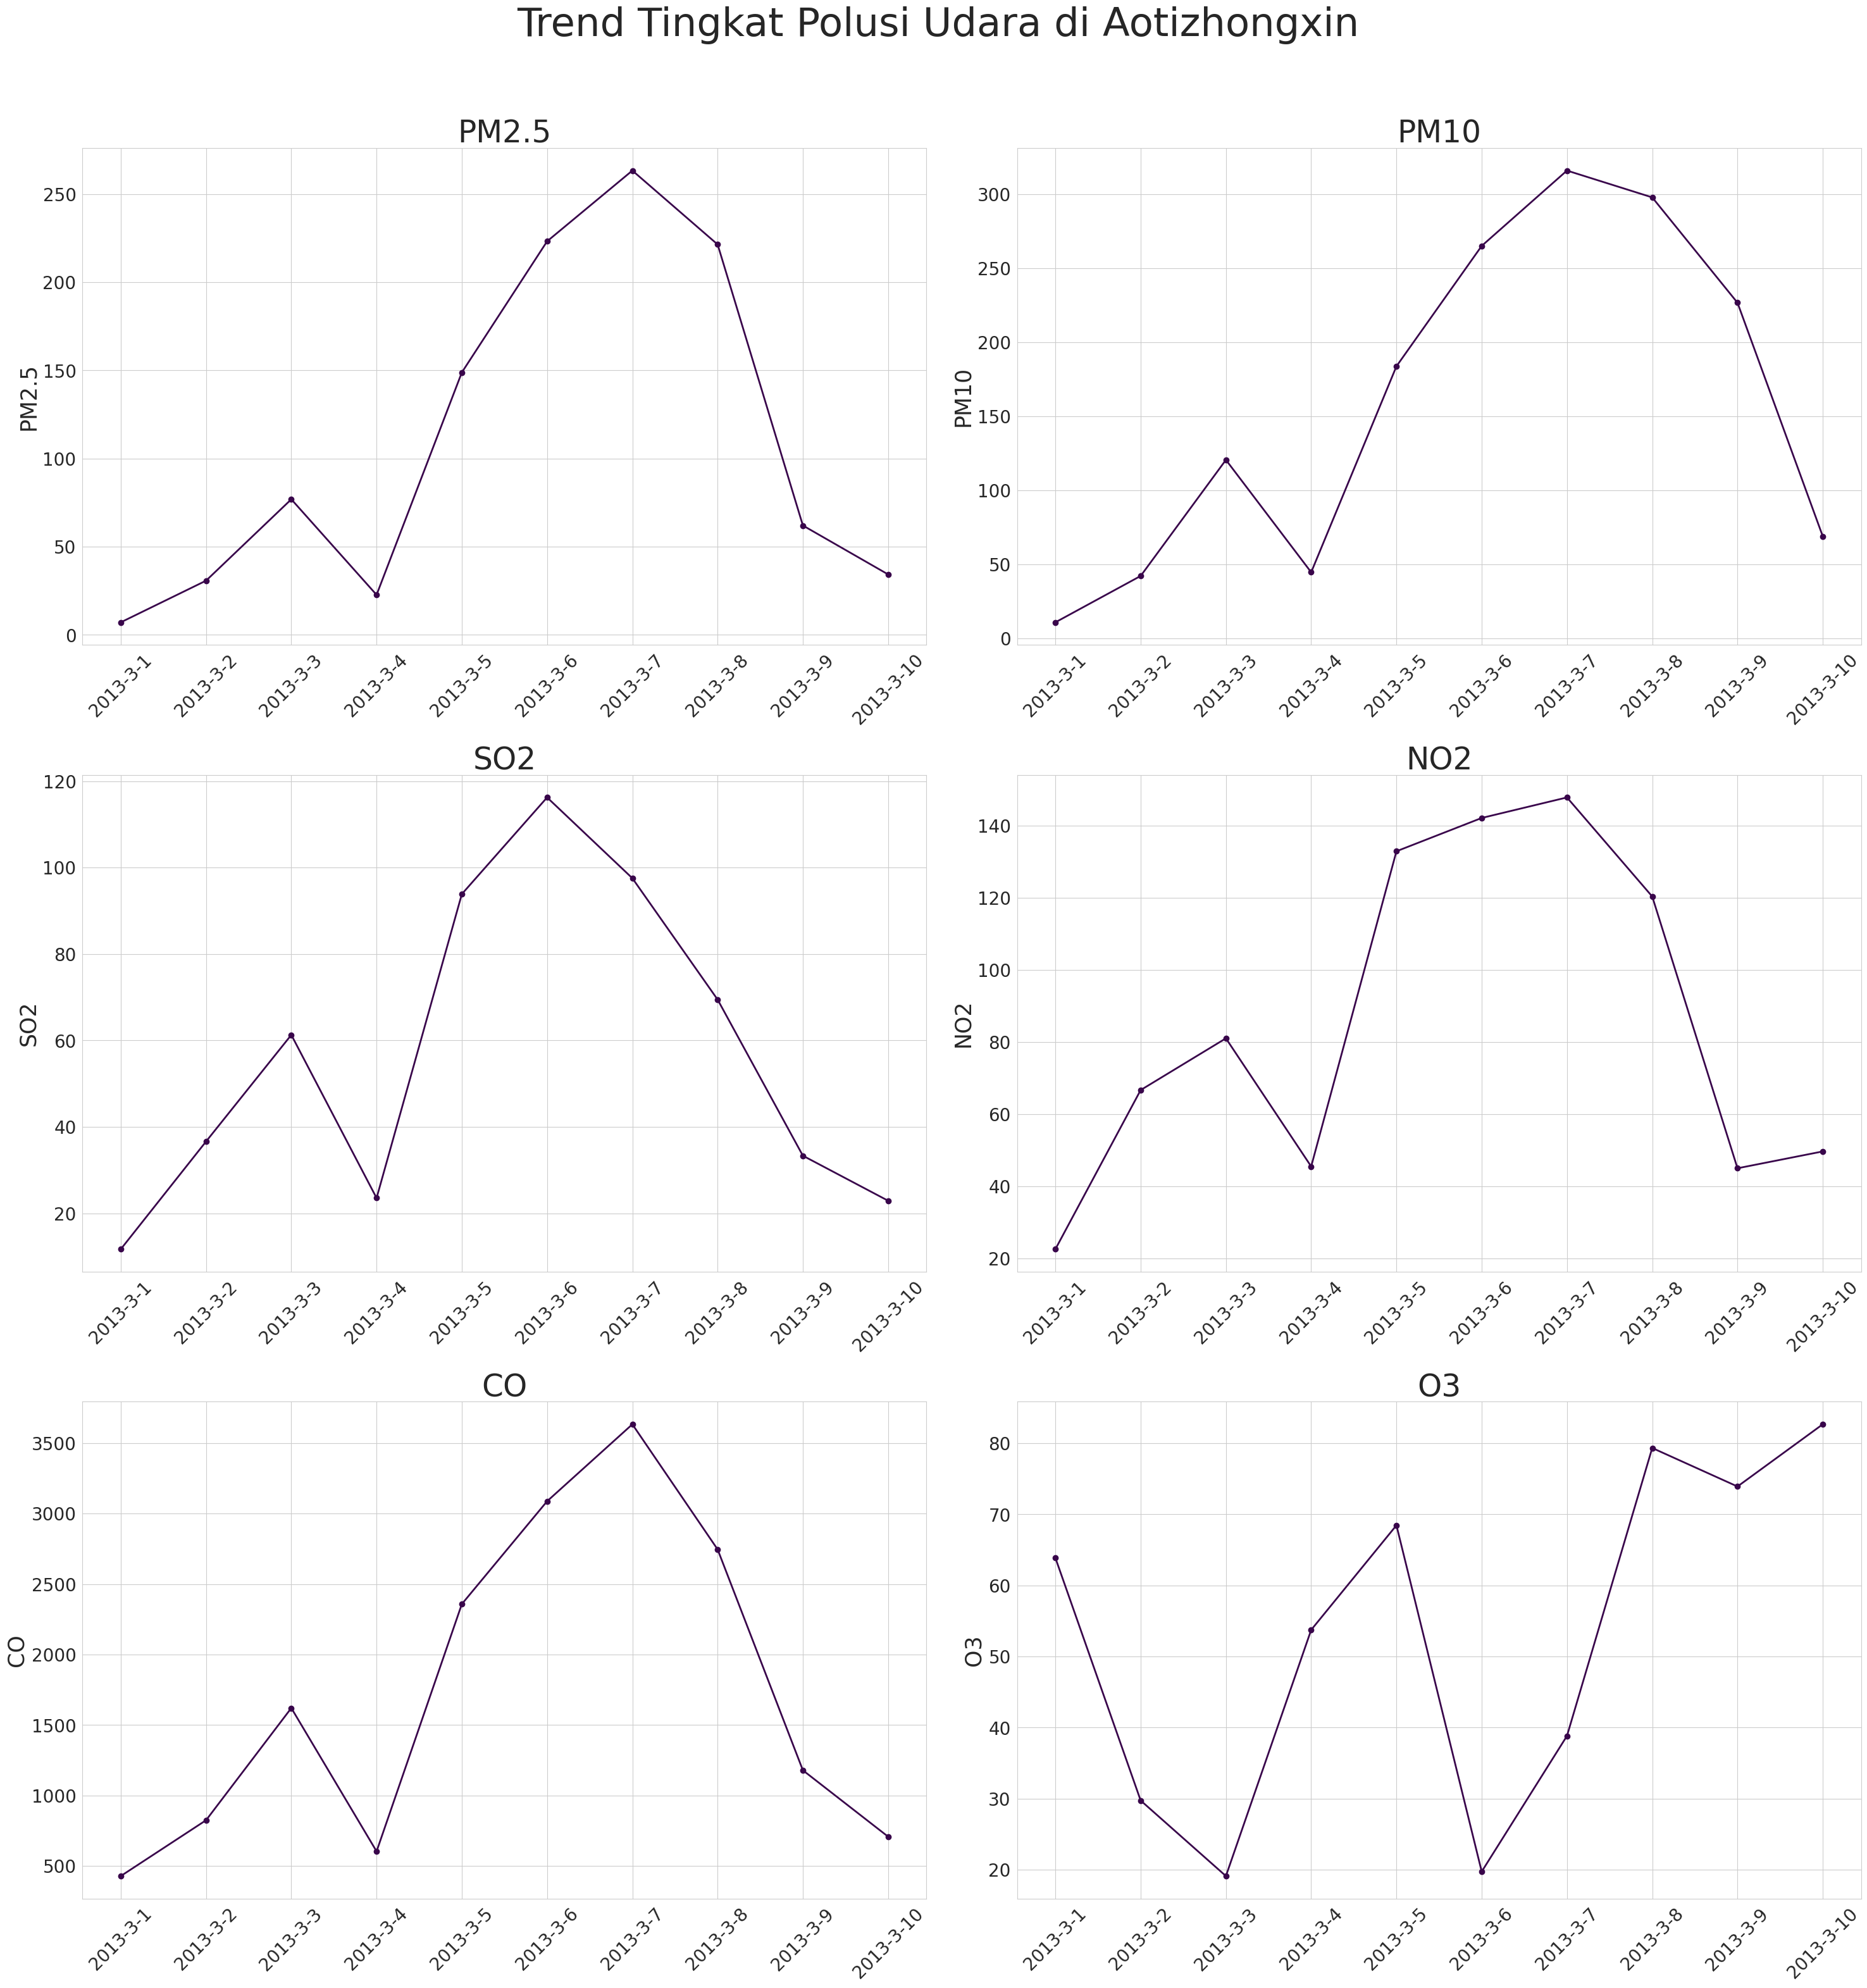

In [95]:
# Menampilkan grafik trend polusi 2013-03-01 sampai 2013-03-10
air_polution_graph(air_polution_day.head(10))

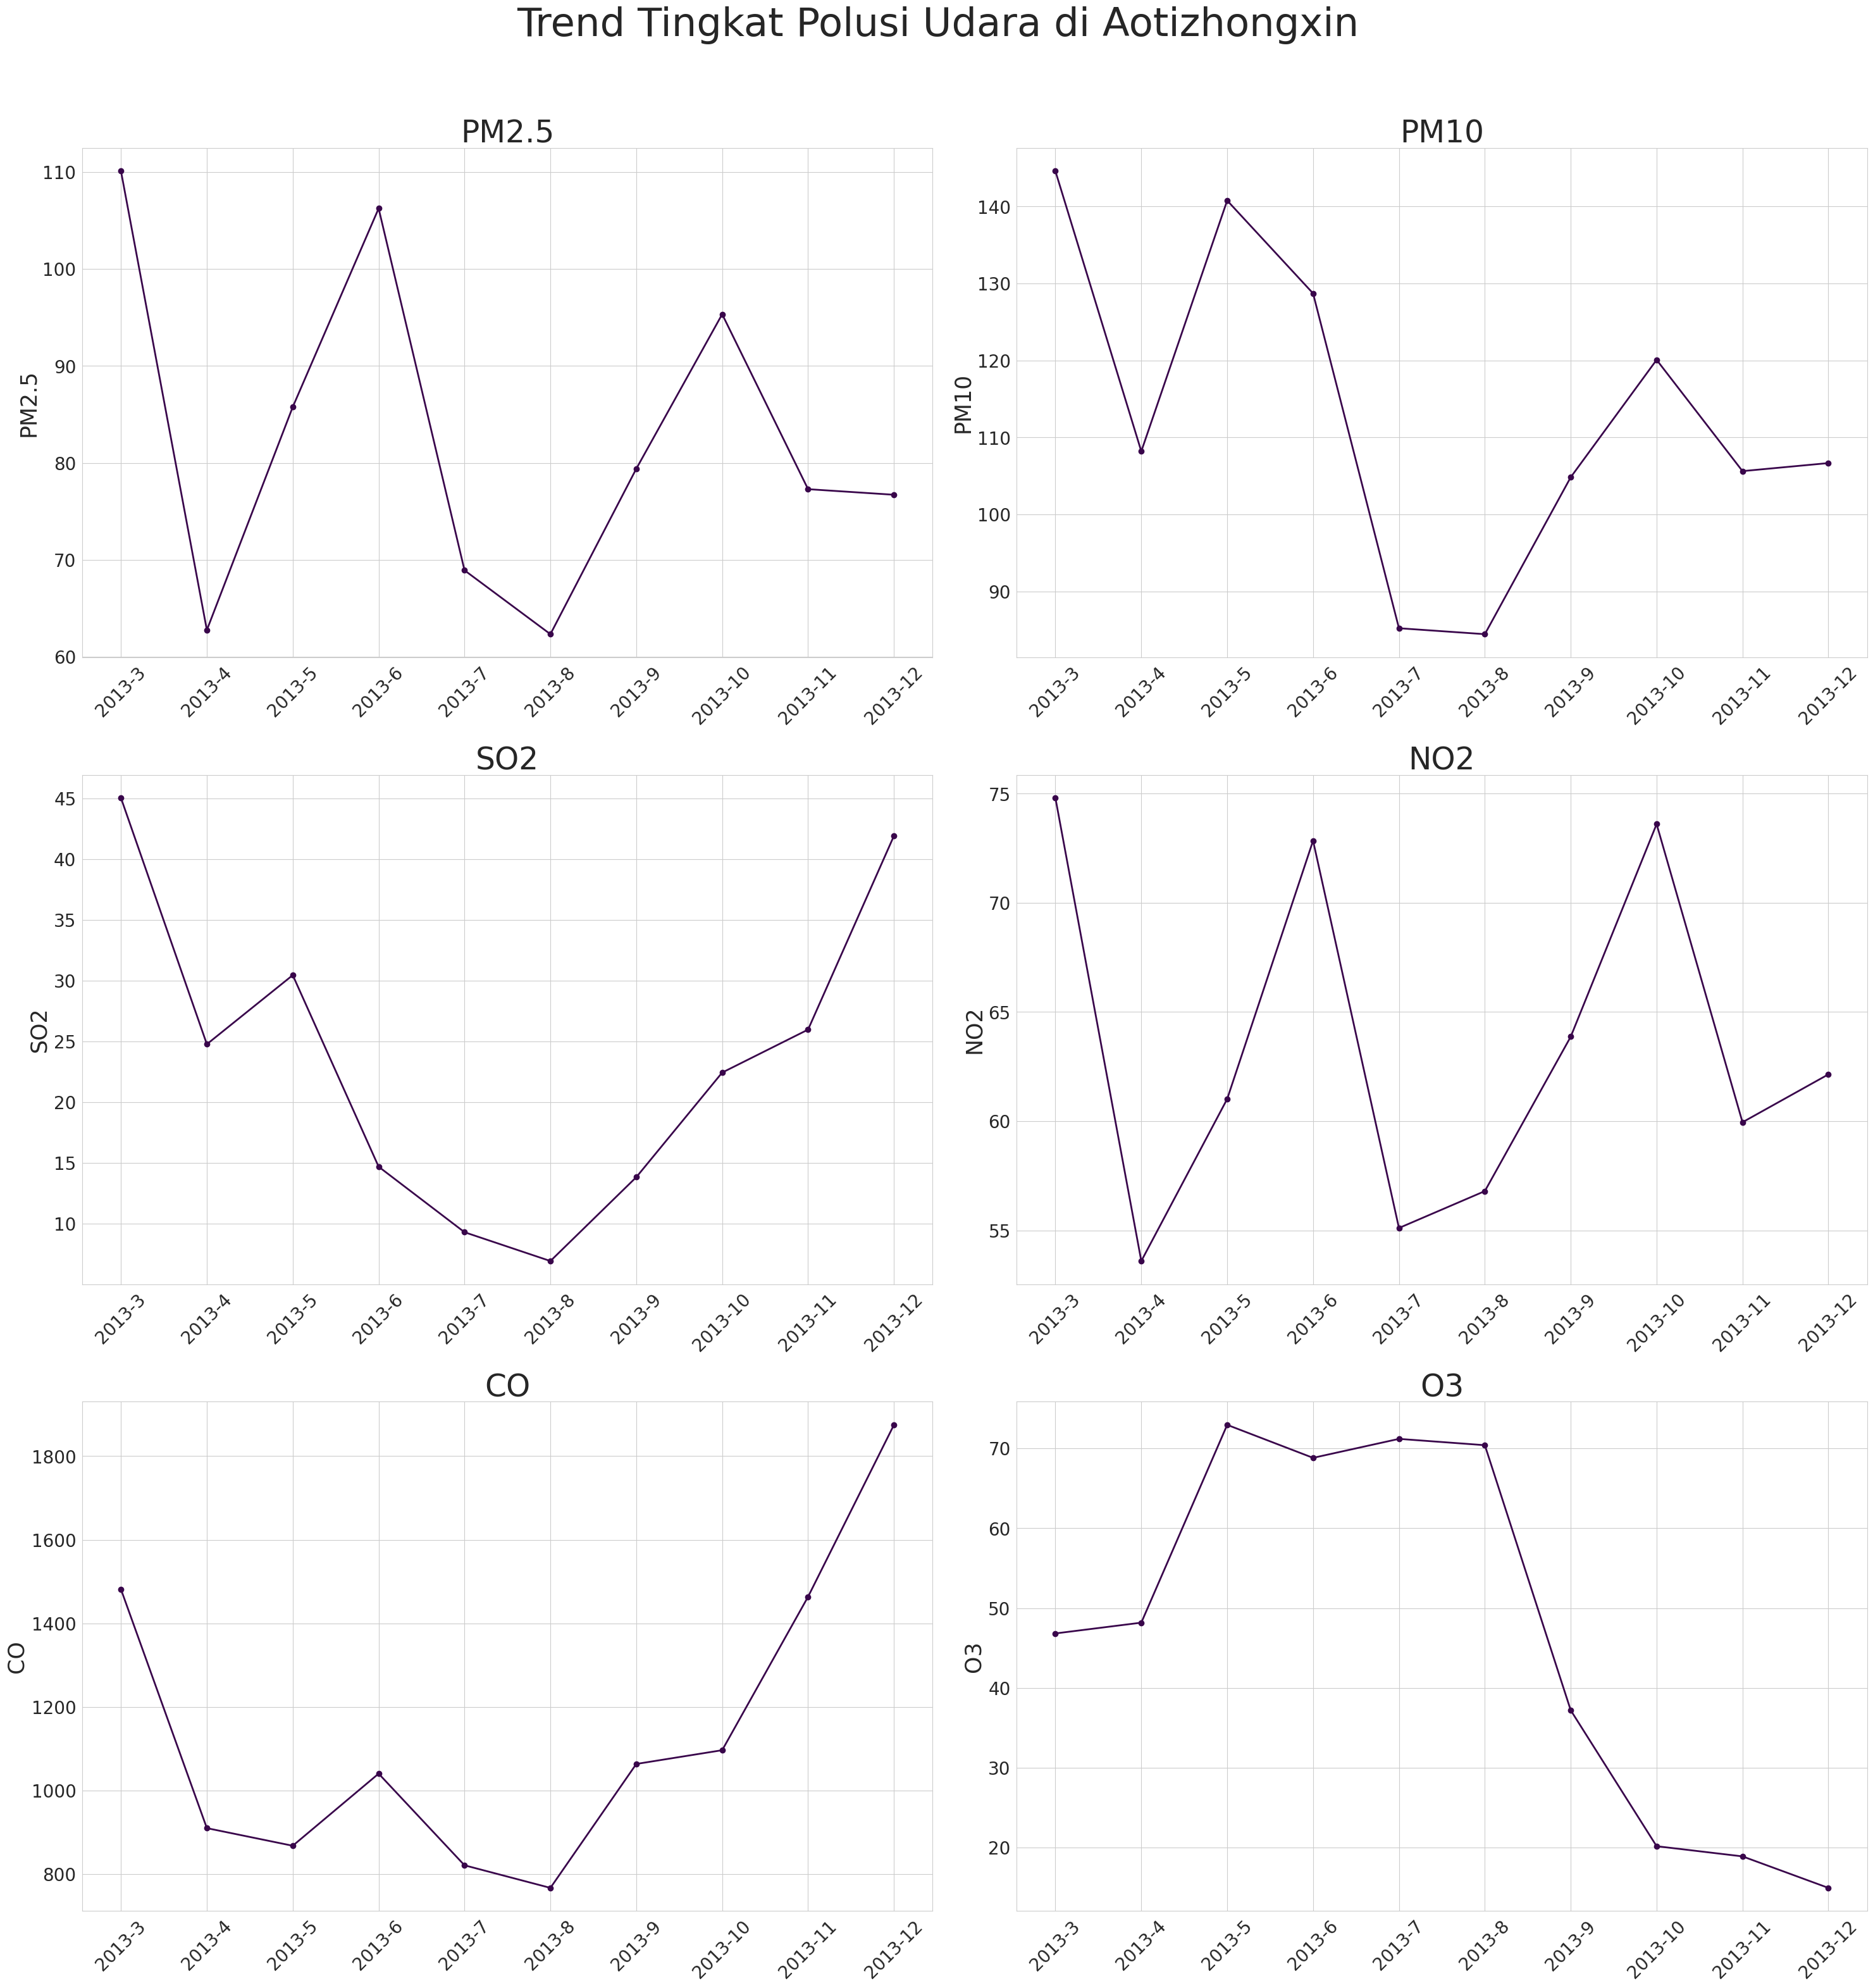

In [96]:
# Menampilkan grafik trend polusi 2013-03 sampai 2013-10
air_polution_graph(air_polution_month.head(10))

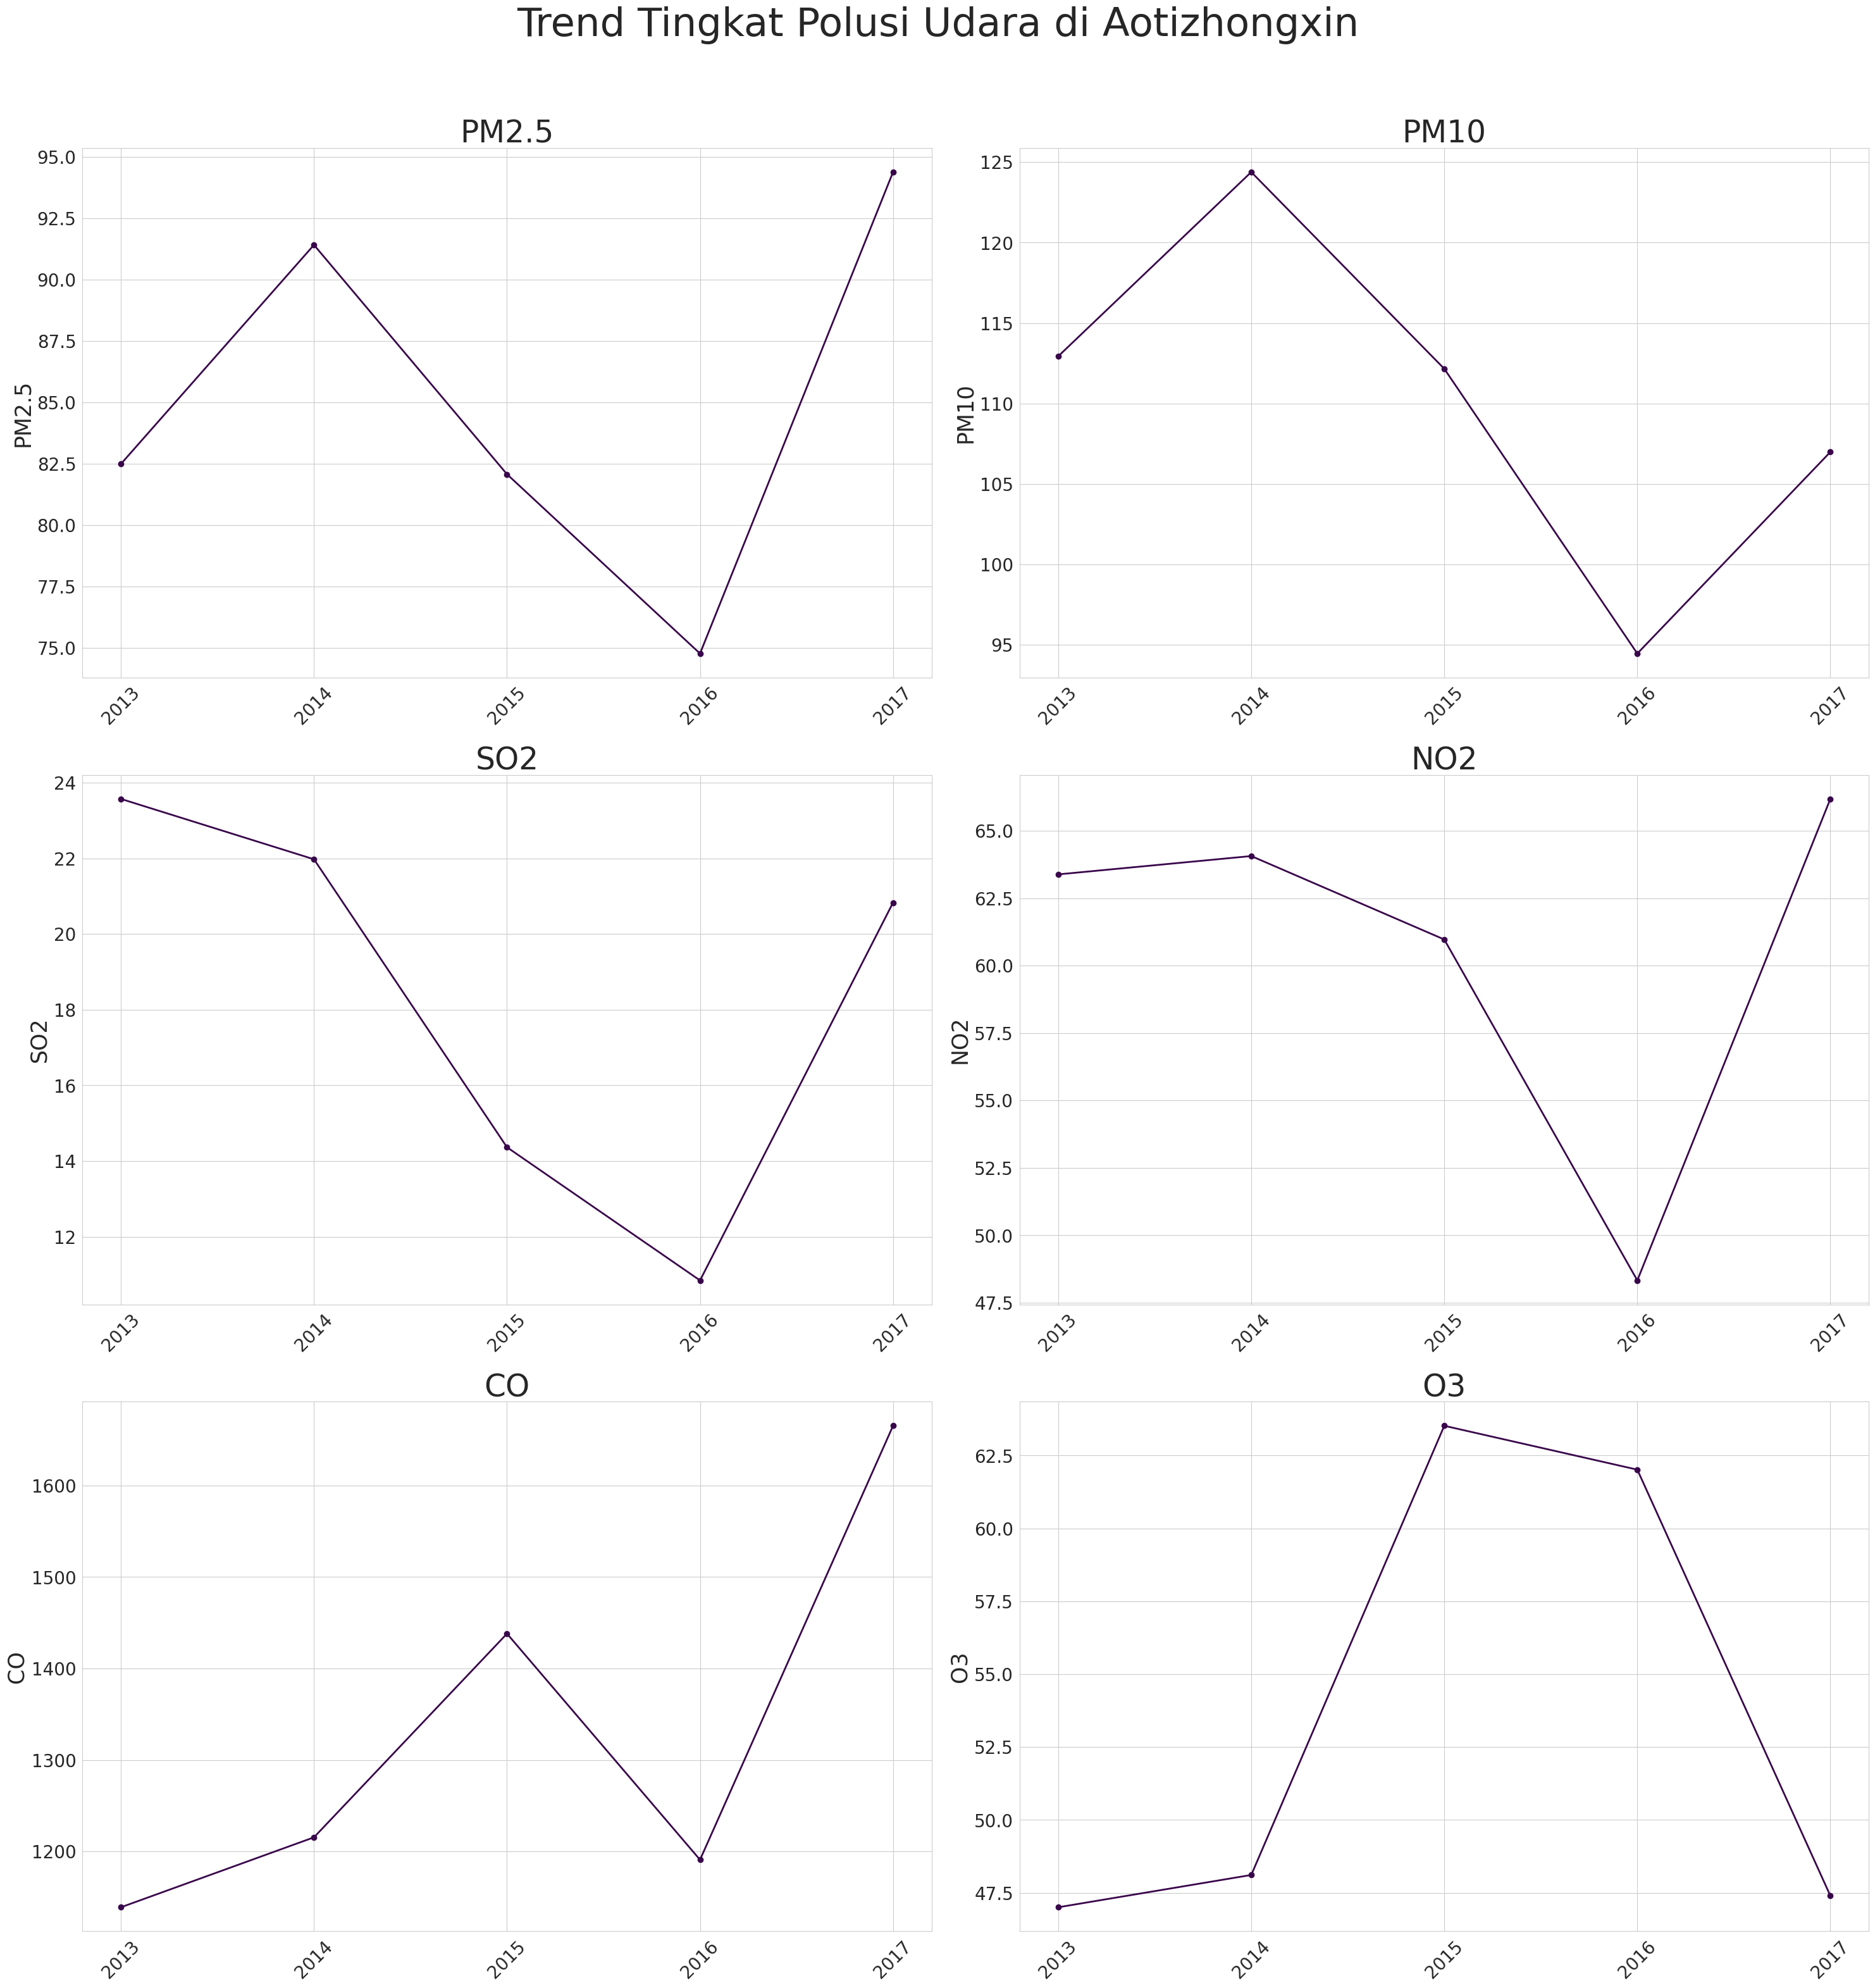

In [97]:
# Menampilkan grafik trend polusi 2013 sampai 2017
air_polution_graph(air_polution_year.head(10))

Pada masing masing hasil eksplorasi data ini, akan ditampilkan apakah ilai PM2.5 dan PM10 rata rata pada rentang waktu tersebut masih termasuk sehat atau tidak berdasarkan acuan BMKG. Untuk acuan batasnya sebagai berikut
1. PM2.5:
   - PM2.5 ≤ 15,5 Baik
   - 15,6 ≤ PM2.5 ≤ 55,4 Sedang
   - 55,5 ≤ PM2.5 ≤ 150,4 Tidak Sehat
   - 150,4 ≤ PM2.5 ≤ 250,4 Sangat Tidak Sehat
   - PM2.5 ≥ 250,5 Berbahaya
2. PM10:
   - PM10 ≤ 50 Baik
   - 51 ≤ PM10 ≤ 150 Sedang
   - 151 ≤ PM10 ≤ 350 Tidak Sehat
   - 351 ≤ PM10 ≤ 420 Sangat Tidak Sehat
   - PM10 ≥ 421 Berbahaya


Selain itu ditampilkan juga nilai rata rata dari tingkat SO2, NO2, CO2 dan O3. Proses dilakukan dengan menggunakan fungsi airpolution_show(df).

In [28]:
def airpolution_show(df):
    pm25= round(df['PM2.5'].mean(), 1)
    pm10= round(df['PM10'].mean(), 0)
    SO2= round(df['SO2'].mean(), 2)
    NO2= round(df['NO2'].mean(), 2)
    CO= round(df['CO'].mean(), 2)
    O3= round(df['O3'].mean(),2)

    if (pm25 <= 15.5):
      print("Rata-rata PM2.5: " + str(pm25) + "\n BAIK" )
    elif ((pm25 >= 15.6) & (pm25 <= 55.4)):
      print("Rata-rata PM2.5: " + str(pm25) + "\n SEDANG" )
    elif ((pm25 >= 55.5) & (pm25 <= 150.4)):
      print("Rata-rata PM2.5: " + str(pm25) + "\n TIDAK SEHAT" )
    elif ((pm25 >= 150.5) & (pm25 <= 250.4)):
      print("Rata-rata PM2.5: " + str(pm25)+ "\n SANGAT TIDAK SEHAT")
    else:
      print("Rata-rata PM2.5: " + str(pm25) + "\n BERBAHAYA" )

    if (pm10 <= 50):
      print("Rata-rata PM10: " + str(pm10) + "\n BAIK" )
    elif ((pm10  >= 51) & (pm10 <= 150)):
      print("Rata-rata PM10: " + str(pm10) + "\n SEDANG" )
    elif ((pm10  >= 151) & (pm10  <= 350)):
      print("Rata-rata PM10: " + str(pm10) + "\n TIDAK SEHAT" )
    elif ((pm10 >= 351) & (pm10 <= 420)):
      print("Rata-rata PM10: " + str(pm10) + "\n SANGAT TIDAK SEHAT" )
    else:
      print("Rata-rata PM10: " + str(pm10) + "\n BERBAHAYA" )

    print("Rata-rata SO2:"+ str(SO2))
    print("Rata-rata NO2:"+ str(NO2))
    print("Rata-rata CO:", str(CO))
    print("Rata-rata O3:", str(O3))

In [38]:
# Klasifikasi tingkat polusi pada 2013-03-01 pukul 00.00-19.00
print("Klasifikasi tingkat polusi pada 2013-03-01 pukul 00.00-19.00")
airpolution_show(air_polution_hour.head(20))

Klasifikasi tingkat polusi pada 2013-03-01 pukul 00.00-19.00
Rata-rata PM2.5: 5.4
 BAIK
Rata-rata PM10: 9.0
 BAIK
Rata-rata SO2:10.25
Rata-rata NO2:18.15
Rata-rata CO: 395.0
Rata-rata O3: 68.0


In [39]:
# Klasifikasi tingkat polusi pada 2013-03-01 sampai 2013-03-10
print("Klasifikasi tingkat polusi pada 2013-03-01 sampai 2013-03-10 ")
airpolution_show(air_polution_day.head(10))

Klasifikasi tingkat polusi pada 2013-03-01 sampai 2013-03-10 
Rata-rata PM2.5: 109.1
 TIDAK SEHAT
Rata-rata PM10: 158.0
 TIDAK SEHAT
Rata-rata SO2:56.65
Rata-rata NO2:85.34
Rata-rata CO: 1718.96
Rata-rata O3: 52.95


In [40]:
# Klasifikasi tingkat polusi pada 2013-03 sampai 2013-10
print("Klasifikasi tingkat polusi pada 2013-03 sampai 2013-10")
airpolution_show(air_polution_month.head(10))

Klasifikasi tingkat polusi pada 2013-03 sampai 2013-10
Rata-rata PM2.5: 82.5
 TIDAK SEHAT
Rata-rata PM10: 113.0
 SEDANG
Rata-rata SO2:23.52
Rata-rata NO2:63.37
Rata-rata CO: 1138.76
Rata-rata O3: 46.96


In [43]:
# Klasifikasi tingkat polusi pada 2013 sampai 2017
print("Klasifikasi tingkat polusi pada 2013 sampai 2013")
airpolution_show(air_polution_year.head(5))

Klasifikasi tingkat polusi pada 2013 sampai 2013
Rata-rata PM2.5: 85.0
 TIDAK SEHAT
Rata-rata PM10: 110.0
 SEDANG
Rata-rata SO2:18.32
Rata-rata NO2:60.58
Rata-rata CO: 1329.74
Rata-rata O3: 53.61


### Pertanyaan 2: Bagaimana trend perubahan suhu dan tekanan udara di Aotizhongxin?


Pembuatan masing-masing grafik trend dilakukan dengan fungsi air_parameters_graph(df).

Masing-masing dataframe air_parameters_hour, air_parameters_day, air_parameters_month, dan air_parameters_year digunakan sebagai input. Ingat yang dimasukkan hanya sejumlah data awal sesuai pada tahapan eksplorasi.

In [98]:
def air_parameters_graph(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    ax[0].plot(df['time'], df['TEMP'], marker='o', linewidth=2, color="#39064B")
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0].set_ylabel("Suhu (°C)", fontsize=25)
    ax[0].set_title("Suhu", loc="center", fontsize=35)

    ax[1].plot(df['time'], df['PRES'], marker='o', linewidth=2, color="#39064B")
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1].set_ylabel("Tekanan (hPa)", fontsize=25)
    ax[1].set_title("Tekanan", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Perubahan Suhu dan Tekanan Udara di Aotizhongxin", fontsize=45, y=1.05)
    plt.show()

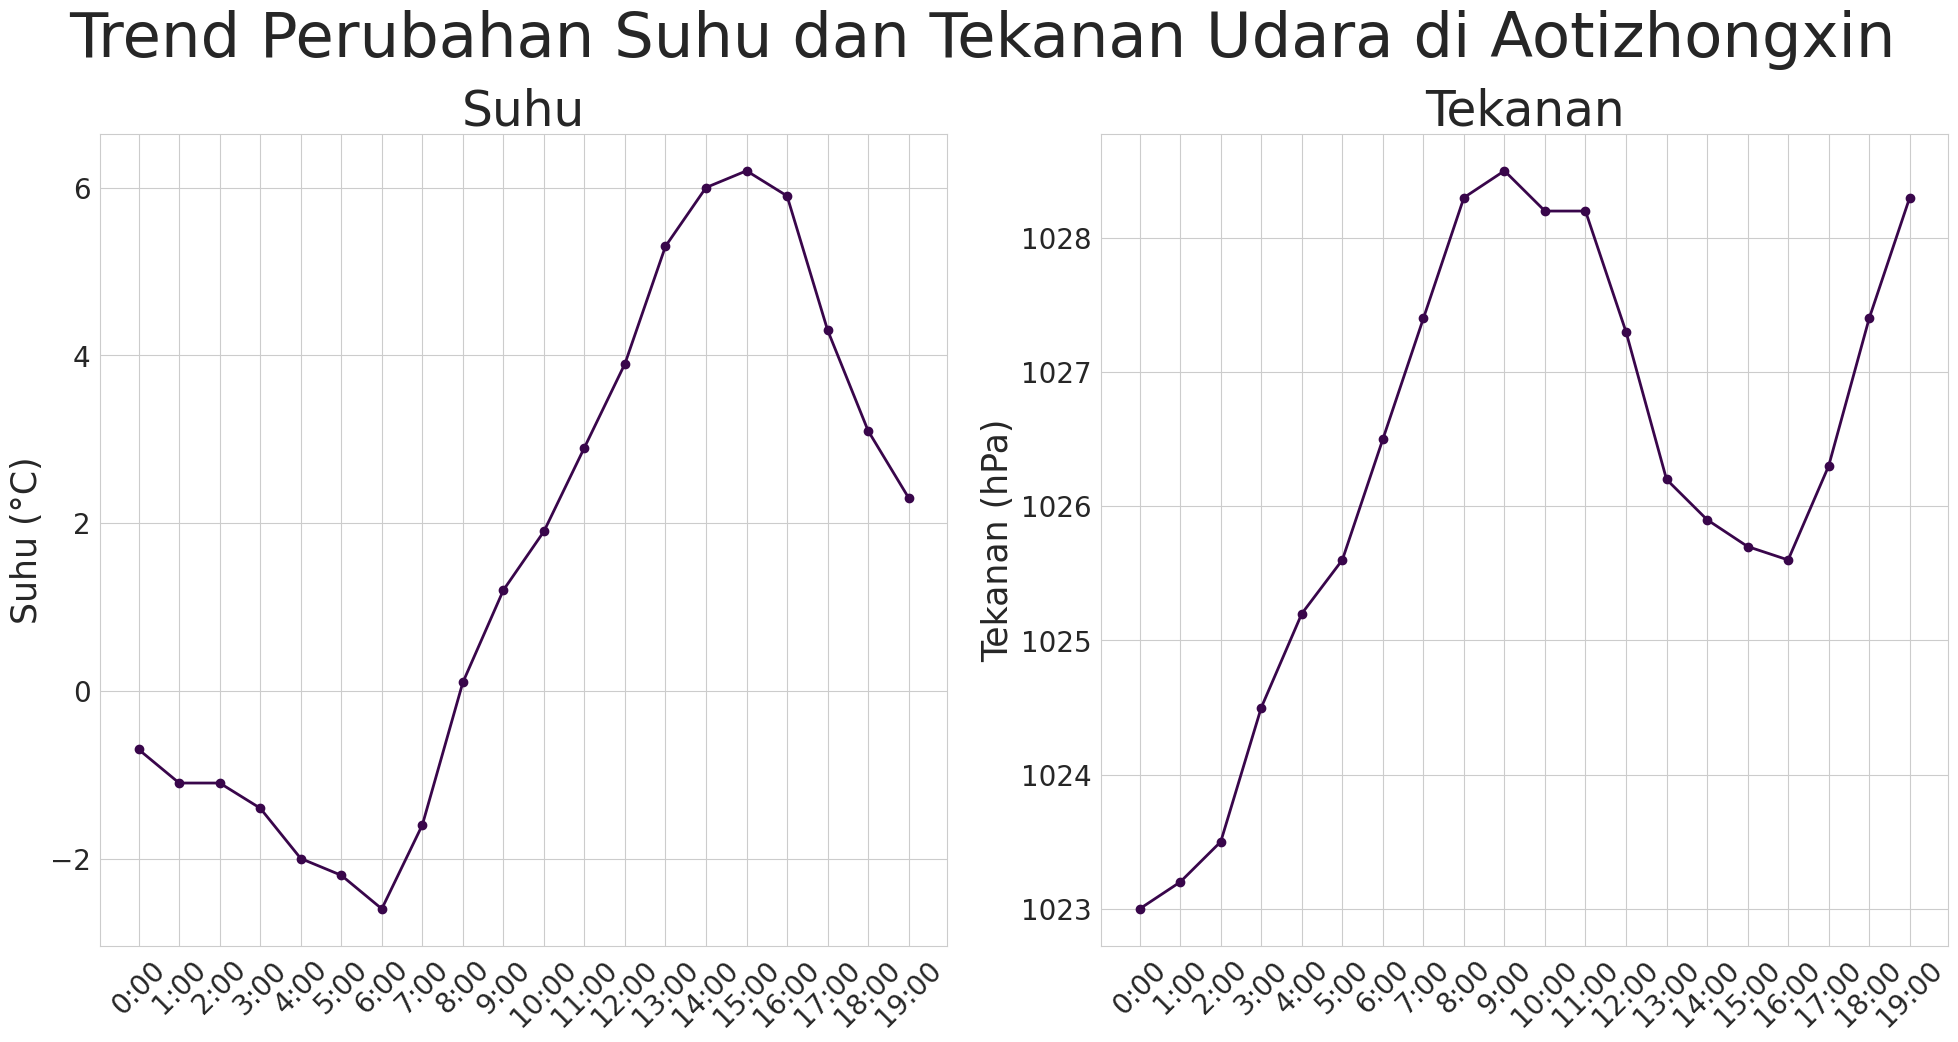

In [99]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013-03-01 pukul 00.00-19.00
air_parameters_graph(air_parameters_hour.head(20))

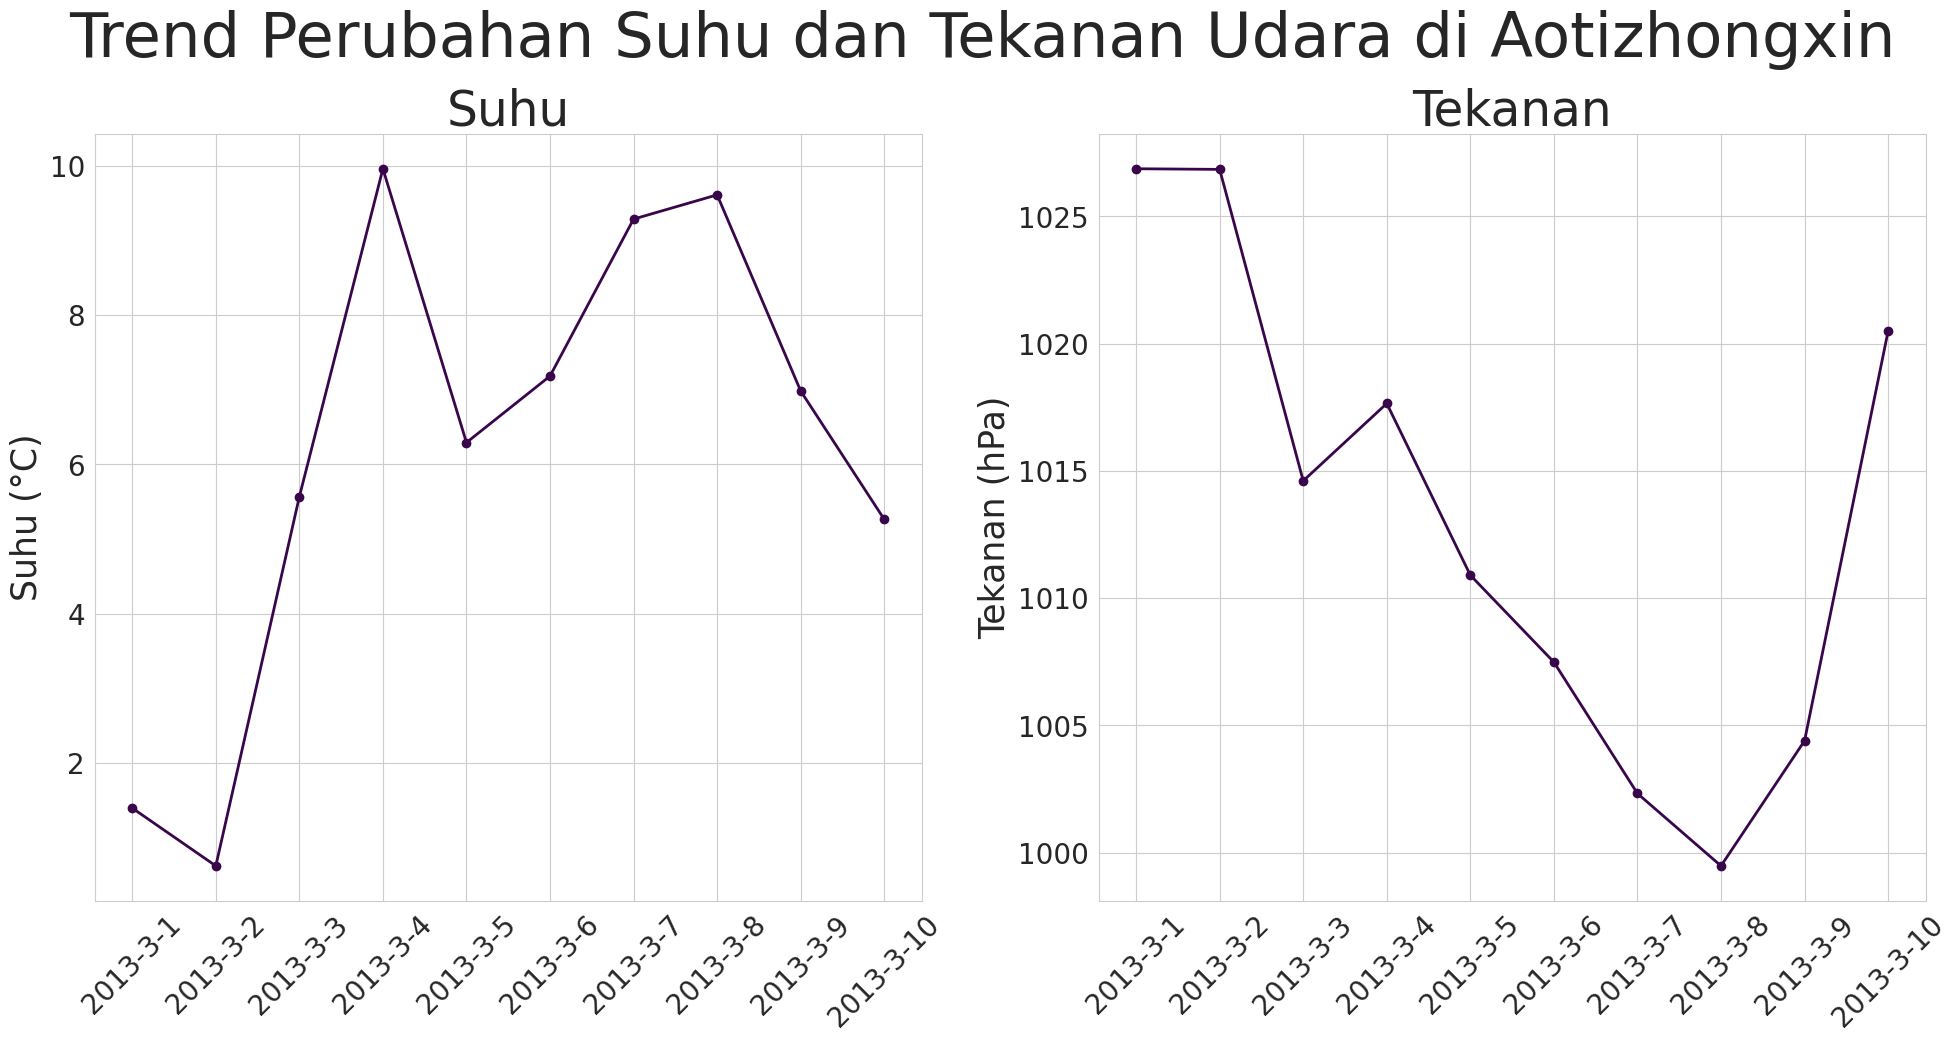

In [100]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013-03-01 sampai 2013-03-10
air_parameters_graph(air_parameters_day.head(10))

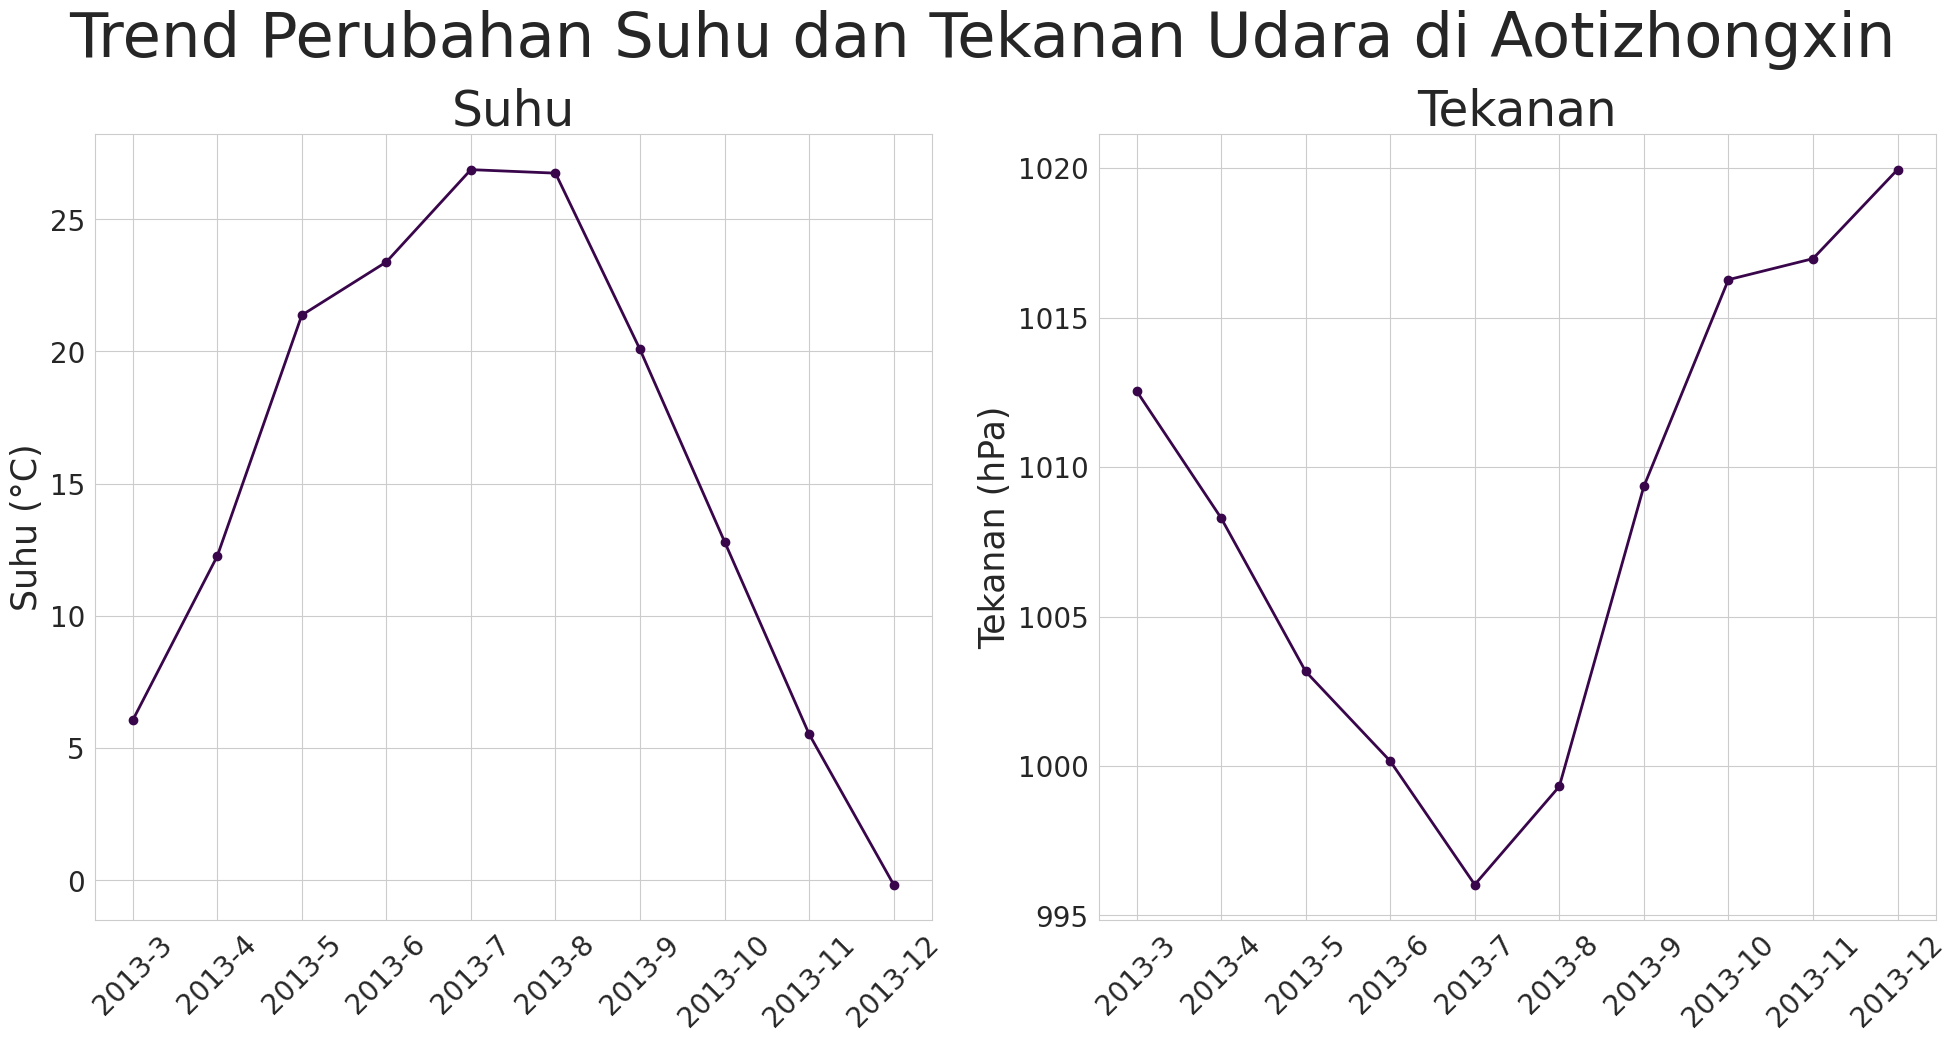

In [101]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013-03 sampai 2013-10
air_parameters_graph(air_parameters_month.head(10))

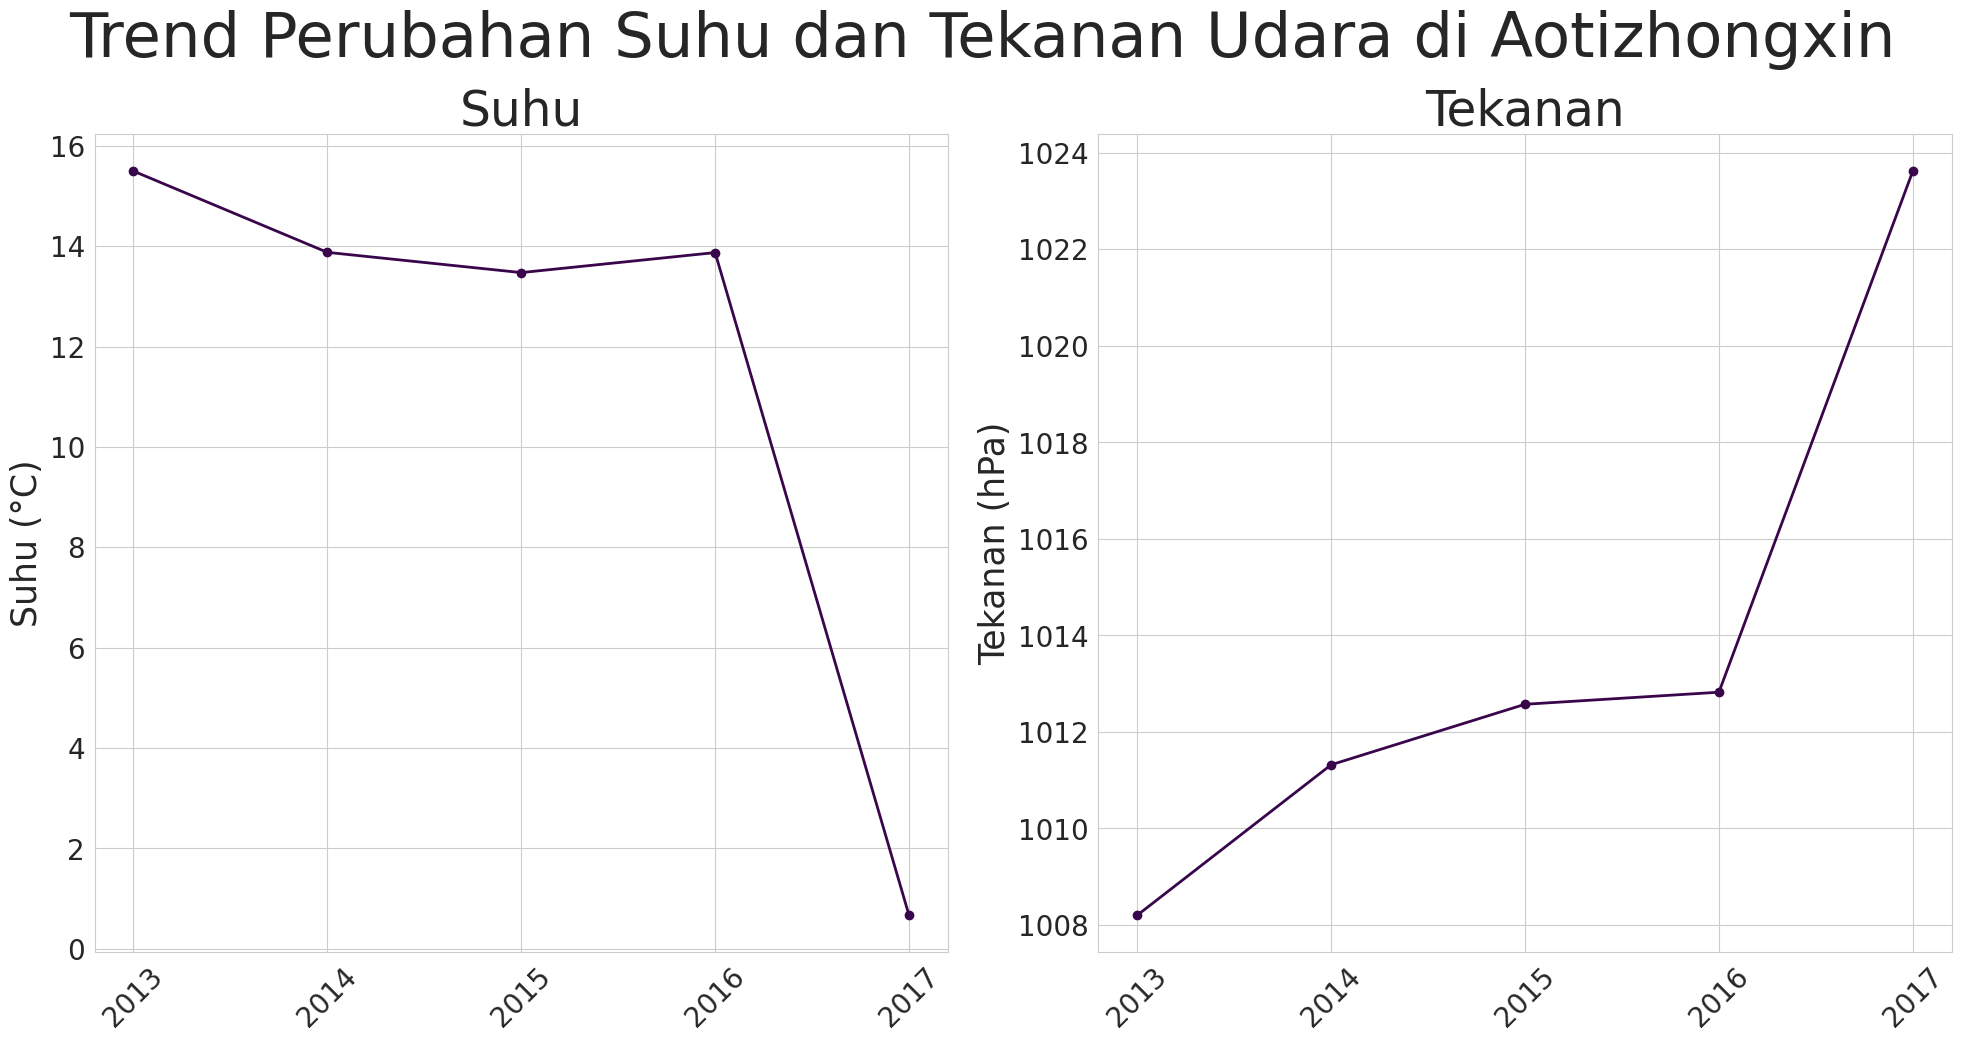

In [107]:
# Menampilkan grafik trend perubahan suhu dan tekanan udara 2013 sampai 2017
air_parameters_graph(air_parameters_year.head(5))

Selanjutnya juga ditunjukkan perhitungan rata-rata suhu dan tekanan udara dari masing-masing rentang waktu tersebut dengan fungsi airparameters_show().

In [58]:
def airparameters_show(df):
    suhu= round(df['TEMP'].mean(), 2)
    tekanan= round(df['PRES'].mean(), 2)

    print("Rata-rata suhu:", str(suhu) + " °C")
    print("Rata-rata tekanan:", str(tekanan) + " hPa")

In [60]:
#  Rata-rata suhu dan tekanan udara pada 2013-03-01 pukul 00.00-19.00
print("2013-03-01 pukul 00.00-19.00 \n")
airparameters_show(air_parameters_hour.head(20))

2013-03-01 pukul 00.00-19.00 

Rata-rata suhu: 1.52 °C
Rata-rata tekanan: 1026.24 hPa


In [61]:
#  Rata-rata suhu dan tekanan udara pada 2013-03-01 sampai 2013-03-10
print("2013-03-01 sampai 2013-03-10 \n")
airparameters_show(air_parameters_day.head(10))

2013-03-01 sampai 2013-03-10 

Rata-rata suhu: 6.22 °C
Rata-rata tekanan: 1013.1 hPa


In [63]:
#  Rata-rata suhu dan tekanan udara pada 2013-03 sampai 2013-10
print("2013-03 sampai 2013-10 \n")
airparameters_show(air_parameters_month.head(10))

2013-03 sampai 2013-10 

Rata-rata suhu: 15.5 °C
Rata-rata tekanan: 1008.21 hPa


In [106]:
#  Rata-rata suhu dan tekanan udara pada 2013 sampai 2017
print("2013 sampai 2017 \n")
airparameters_show(air_parameters_year.head(5))

2013 sampai 2017 

Rata-rata suhu: 11.48 °C
Rata-rata tekanan: 1013.71 hPa


### Pertanyaan 3: Bagaimana pengaruh tingkat polusi udara dengan perubahan suhu dan tekanan di Aotizhongxin?


Dengan menggunakan data eksplorasi perhitungan korelasi dengan metode pearson yang sudah dilakukan pada tahap eksplorasi, maka dapat kita tampilkan grafik korelasi antara tingkat polusi udara dengan perubahan suhu dan tekanan udara. Grafik korelasi ini dapat ditampilkan dalam bentuk heatmap maupun scatter plot

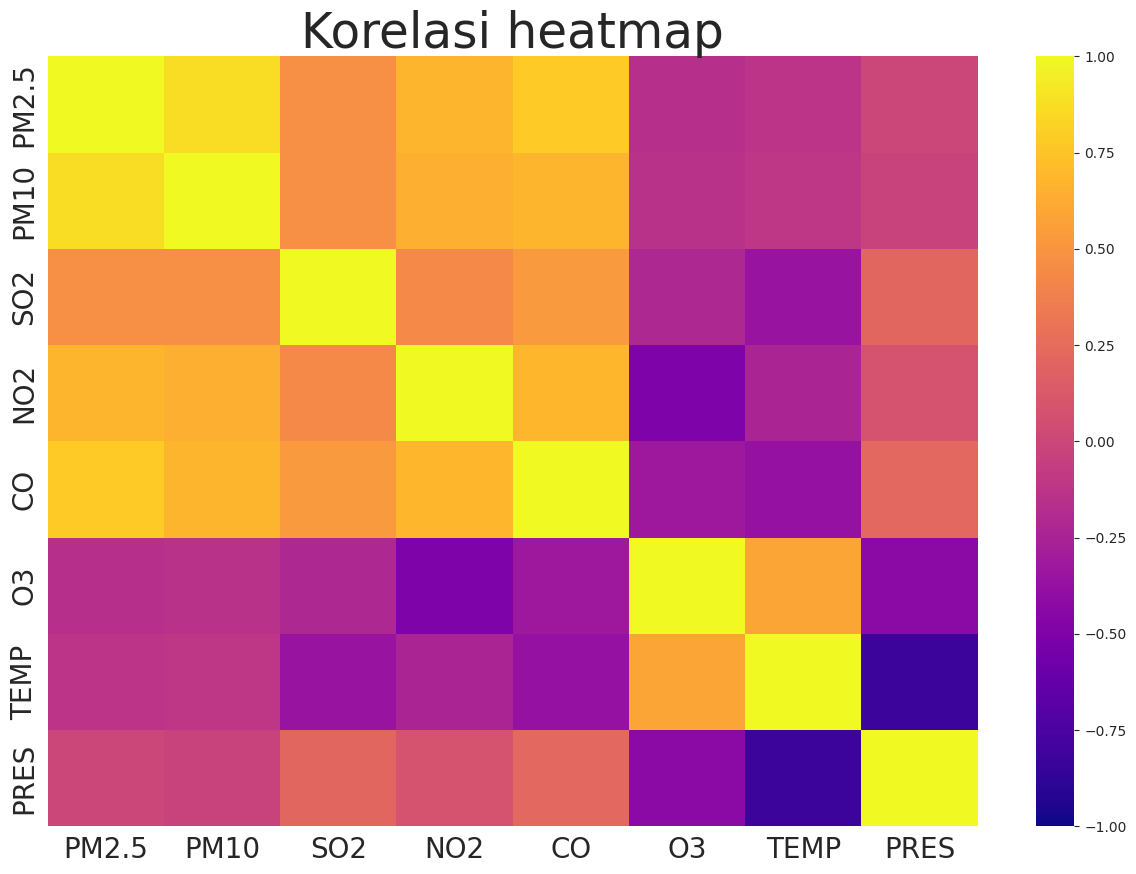

In [108]:
# Tampilan grafik korelasi heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(korelasi, vmax = 1, vmin = -1, center = 0, cmap = "plasma")
ax.tick_params(labelsize = 20)
ax.set_title("Korelasi heatmap", loc="center", fontsize=35)

plt.show()

Tampilan grafik scatter plot dengan menggunakan fungsi corr_scatter_graph(df) dengan input dataframe correlation_df

In [109]:
# Tampilan grafik scatter plot dengan menggunakan fungsi corr_scatter_graph(df)
def corr_scatter_graph(df):
    fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

    ax1[0,0].scatter(df['TEMP'], df['PM2.5'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax1[0,0].set_xticklabels([])
    ax1[0,0].set_yticklabels([])
    ax1[0,0].set_xlabel("SUHU", fontsize = 20)
    ax1[0,0].set_ylabel("PM2.5", fontsize = 20)

    ax1[0,1].scatter(df['TEMP'], df['PM10'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax1[0,1].set_xticklabels([])
    ax1[0,1].set_yticklabels([])
    ax1[0,1].set_xlabel("SUHU", fontsize = 20)
    ax1[0,1].set_ylabel("PM10", fontsize = 20)

    ax1[1,0].scatter(df['TEMP'], df['SO2'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax1[1,0].set_xticklabels([])
    ax1[1,0].set_yticklabels([])
    ax1[1,0].set_xlabel("SUHU", fontsize = 20)
    ax1[1,0].set_ylabel("SO2", fontsize = 20)

    ax1[1,1].scatter(df['TEMP'], df['NO2'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax1[1,1].set_xticklabels([])
    ax1[1,1].set_yticklabels([])
    ax1[1,1].set_xlabel("SUHU", fontsize = 20)
    ax1[1,1].set_ylabel("NO2", fontsize = 20)

    ax1[2,0].scatter(df['TEMP'], df['CO'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax1[2,0].set_xticklabels([])
    ax1[2,0].set_yticklabels([])
    ax1[2,0].set_xlabel("SUHU", fontsize = 20)
    ax1[2,0].set_ylabel("CO", fontsize = 20)

    ax1[2,1].scatter(df['TEMP'], df['O3'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax1[2,1].set_xticklabels([])
    ax1[2,1].set_yticklabels([])
    ax1[2,1].set_xlabel("SUHU", fontsize = 20)
    ax1[2,1].set_ylabel("O3", fontsize = 20)

    fig1.tight_layout(pad=2.0)

    plt.suptitle("Tingkat Polusi Udara VS Suhu", fontsize=45, y=1.05)
    plt.show(fig1)

    fig2, ax2 = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

    ax2[0,0].scatter(df['PRES'], df['PM2.5'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax2[0,0].set_xticklabels([])
    ax2[0,0].set_yticklabels([])
    ax2[0,0].set_xlabel("TEKANAN", fontsize = 20)
    ax2[0,0].set_ylabel("PM2.5", fontsize = 20)

    ax2[0,1].scatter(df['PRES'], df['PM10'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax2[0,1].set_xticklabels([])
    ax2[0,1].set_yticklabels([])
    ax2[0,1].set_xlabel("TEKANAN", fontsize = 20)
    ax2[0,1].set_ylabel("PM10", fontsize = 20)

    ax2[1,0].scatter(df['PRES'], df['SO2'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax2[1,0].set_xticklabels([])
    ax2[1,0].set_yticklabels([])
    ax2[1,0].set_xlabel("TEKANAN", fontsize = 20)
    ax2[1,0].set_ylabel("SO2", fontsize = 20)

    ax2[1,1].scatter(df['PRES'], df['NO2'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax2[1,1].set_xticklabels([])
    ax2[1,1].set_yticklabels([])
    ax2[1,1].set_xlabel("TEKANAN", fontsize = 20)
    ax2[1,1].set_ylabel("NO2", fontsize = 20)

    ax2[2,0].scatter(df['PRES'], df['CO'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax2[2,0].set_xticklabels([])
    ax2[2,0].set_yticklabels([])
    ax2[2,0].set_xlabel("TEKANAN", fontsize = 20)
    ax2[2,0].set_ylabel("CO", fontsize = 20)

    ax2[2,1].scatter(df['PRES'], df['O3'],s = 5, alpha = 0.5, c = "#FACE2D",marker = 'o', edgecolors= "#ed7d53")
    ax2[2,1].set_xticklabels([])
    ax2[2,1].set_yticklabels([])
    ax2[2,1].set_xlabel("TEKANAN", fontsize = 20)
    ax2[2,1].set_ylabel("O3", fontsize = 20)

    fig2.tight_layout(pad=2.0)

    plt.suptitle("Tingkat Polusi Udara VS Tekanan", fontsize=45, y=1.05)
    plt.show(fig2)

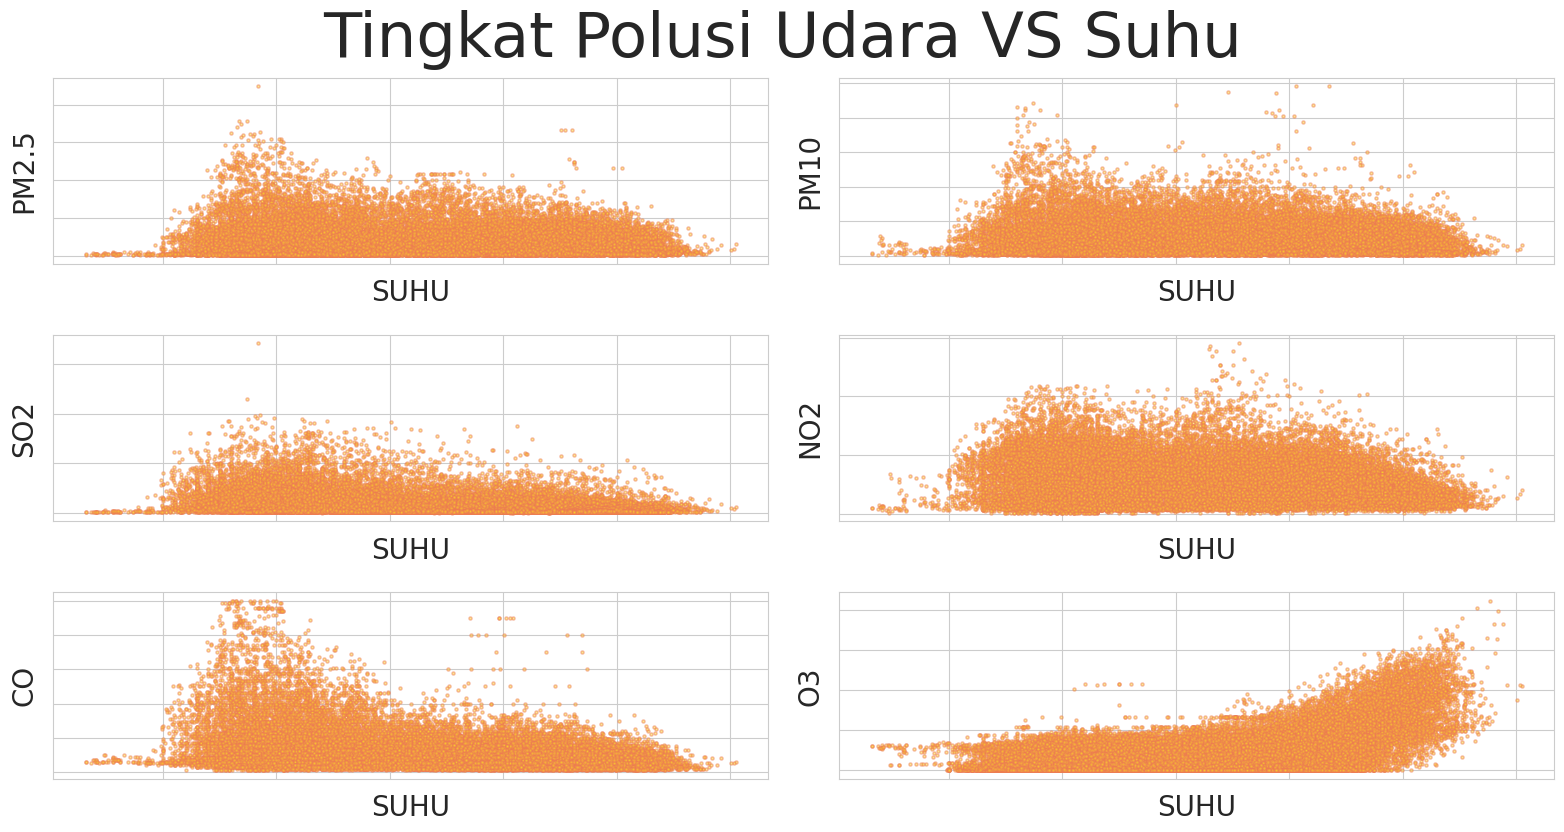

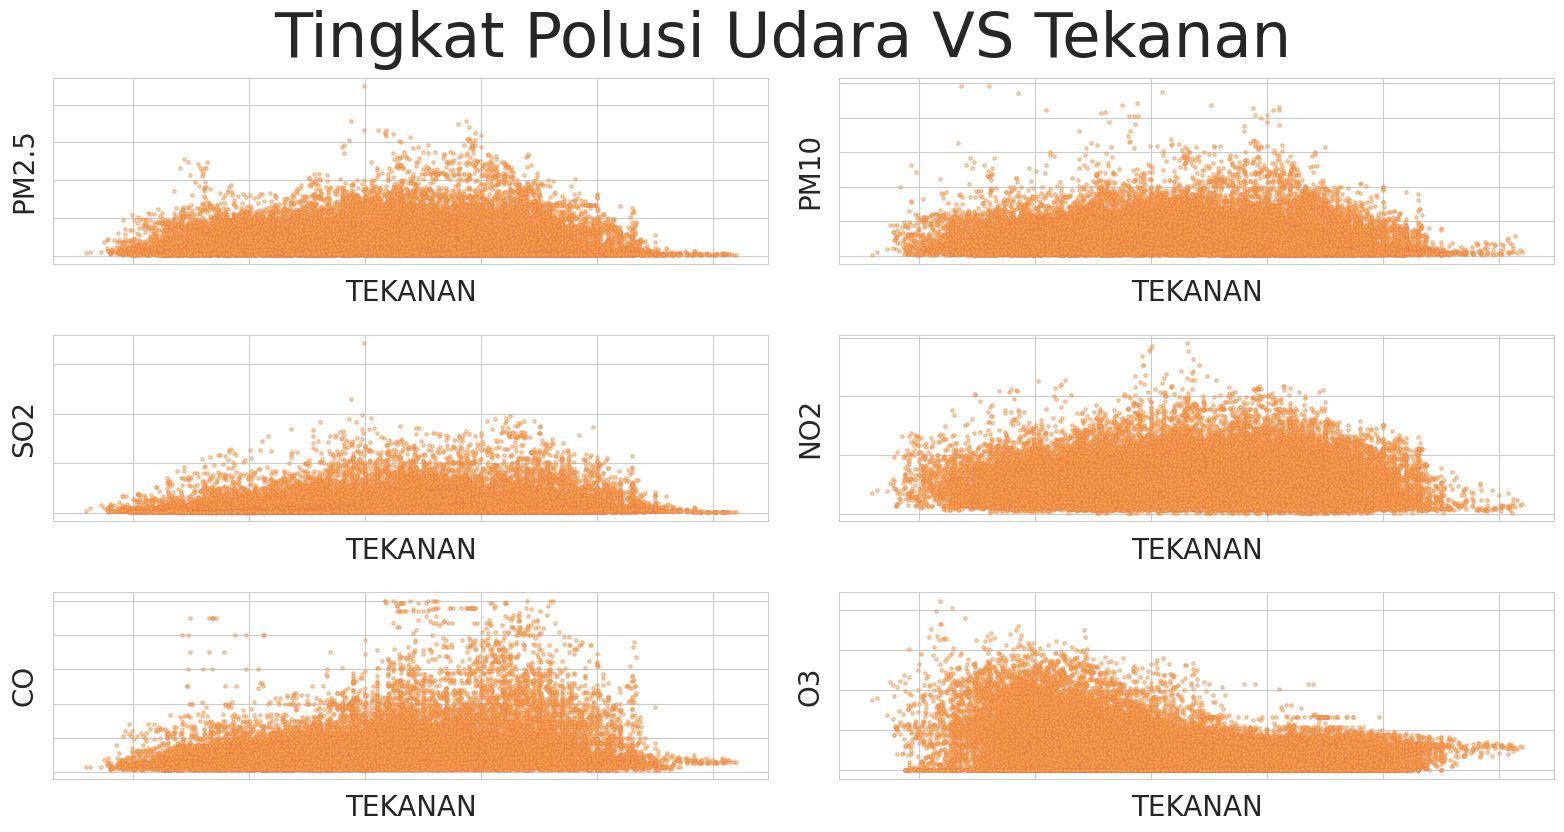

In [110]:
corr_scatter_graph(correlation_df)

### Pertanyaan 4: Pada rentang waktu apa tingkat partikel yang ada di udara di kota Aotizhongxin cenderung tinggi?


Dengan menggunakan timespan_bar_graph(df) dilakukan visualisasi data dari input berupa dataframe timespan_particle_df

In [111]:
def timespan_bar_graph(df):
    warna = ['#F59245', '#F5E926','#CE5270','#9316A0']
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    p = sns.barplot(data= df, x= df['time_span'], y= df['PM2.5'], palette= warna, ax= ax[0], orient= 'v')
    p.tick_params(axis='y', labelsize=20)
    p.tick_params(axis='x', labelsize=20)
    p.set_xlabel(None)
    p.set_ylabel("PM2.5", fontsize = 20)

    p= sns.barplot(data= df, x = df['time_span'], y= df['PM10'], palette= warna, ax=ax[1], orient = 'v')
    p.tick_params(axis='y', labelsize=20)
    p.tick_params(axis='x', labelsize=20)
    p.set_xlabel(None)
    p.set_ylabel("PM10", fontsize = 20)

    plt.suptitle("Tingkat Polusi di Aotizhongxin berdasarkan Rentang Waktu", fontsize=45, y=1.05)
    plt.show()

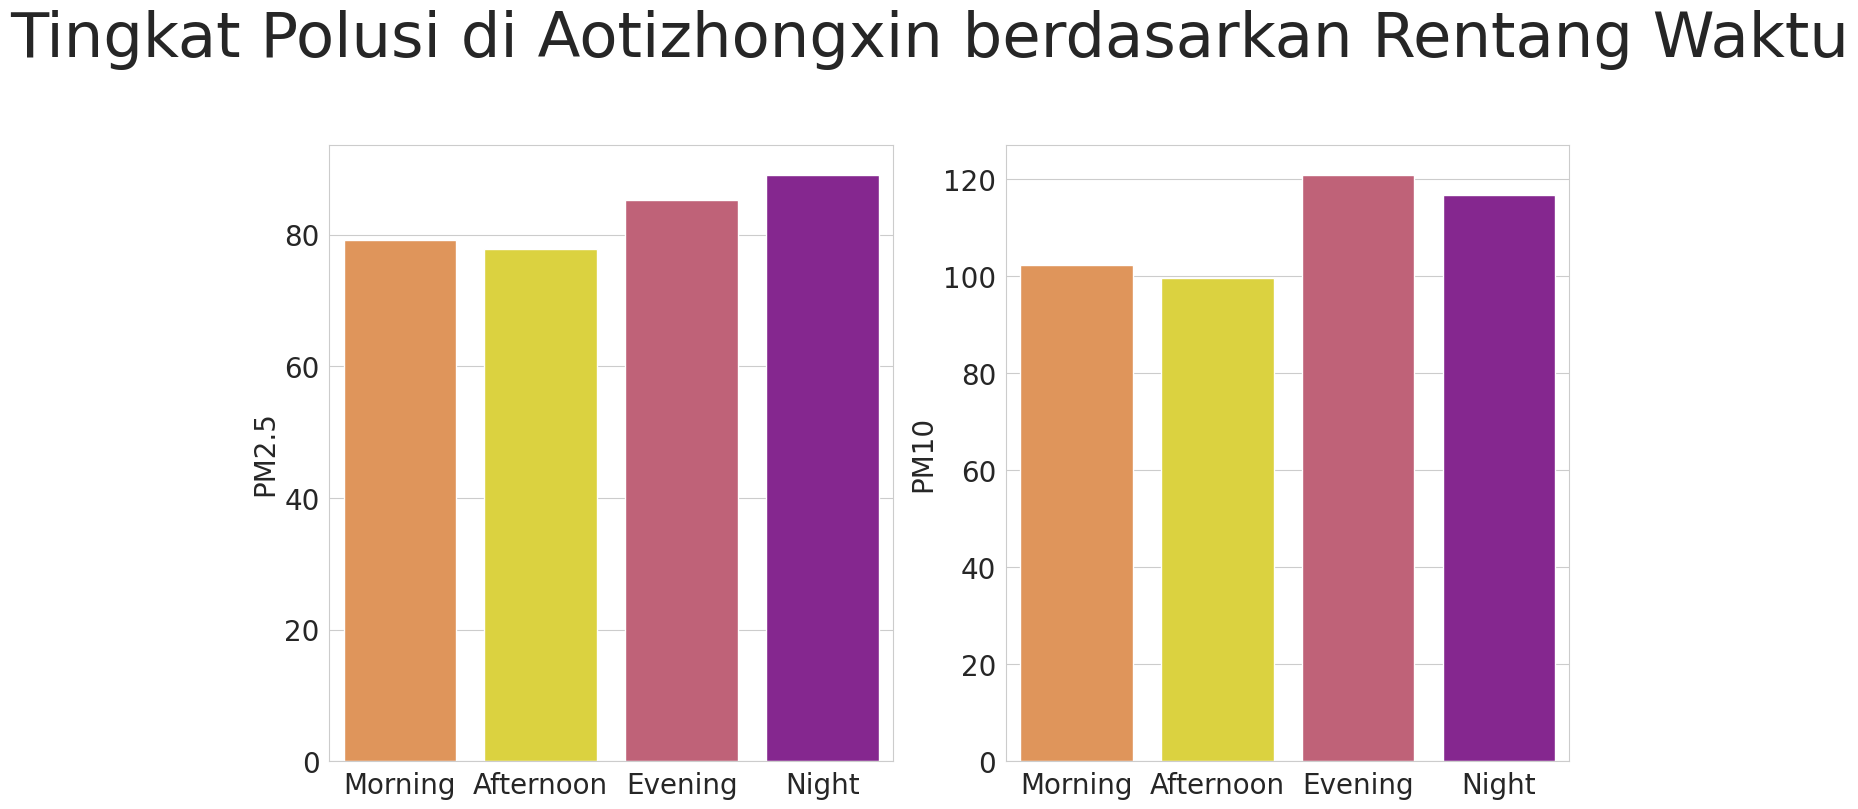

In [112]:
timespan_bar_graph(timespan_particle_df)

### Pertanyaan 5: Bagaimana kecenderungan arah angin di kota Aotizhongxin?


Dengan menggunakan fungsi winddirection_barh_graph(df) dilakukan visualisasi 5 data teratas dataframe wind_direction_df sebagai input.

In [117]:
def winddirection_barh_graph(df):
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(data= df, x= df['percent'], y= df['wind_direction'], palette= 'plasma', ax= ax, orient= 'h')
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax.set_ylabel(None)
    ax.set_xlabel("Percentage (%)", fontsize = 20)
    plt.show()

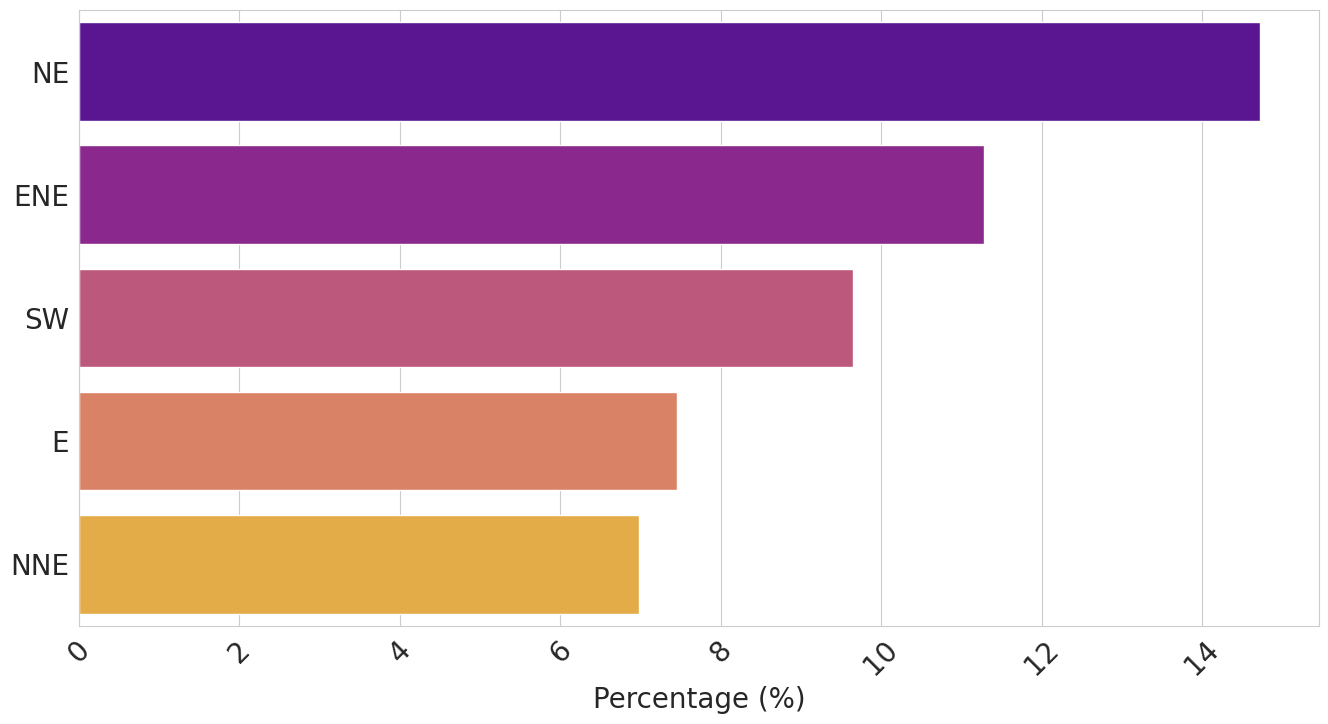

In [118]:
winddirection_barh_graph(wind_direction_df.head(5))

### Pertanyaan 6: Bagaimana perubahan kecepatan angin di kota Aotizhongxin?

Pembuatan masing-masing grafik trend dilakukan dengan fungsi wind_speed_graph(df).

Masing-masing dataframe wind_speed_hour, wind_speed_day, wind_speed_month, dan wind_speed_year digunakan sebagai input. Ingat yang dimasukkan hanya sejumlah data awal sesuai pada tahapan eksplorasi.

In [121]:
def wind_speed_graph(df):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(df['time'], df['WSPM'], marker='o', linewidth=2, color="#BD1266")
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax.set_ylabel("Wind Speed (m/s)", fontsize=25)
    ax.set_title("Wind Speed", loc="center", fontsize=35)
    plt.show()

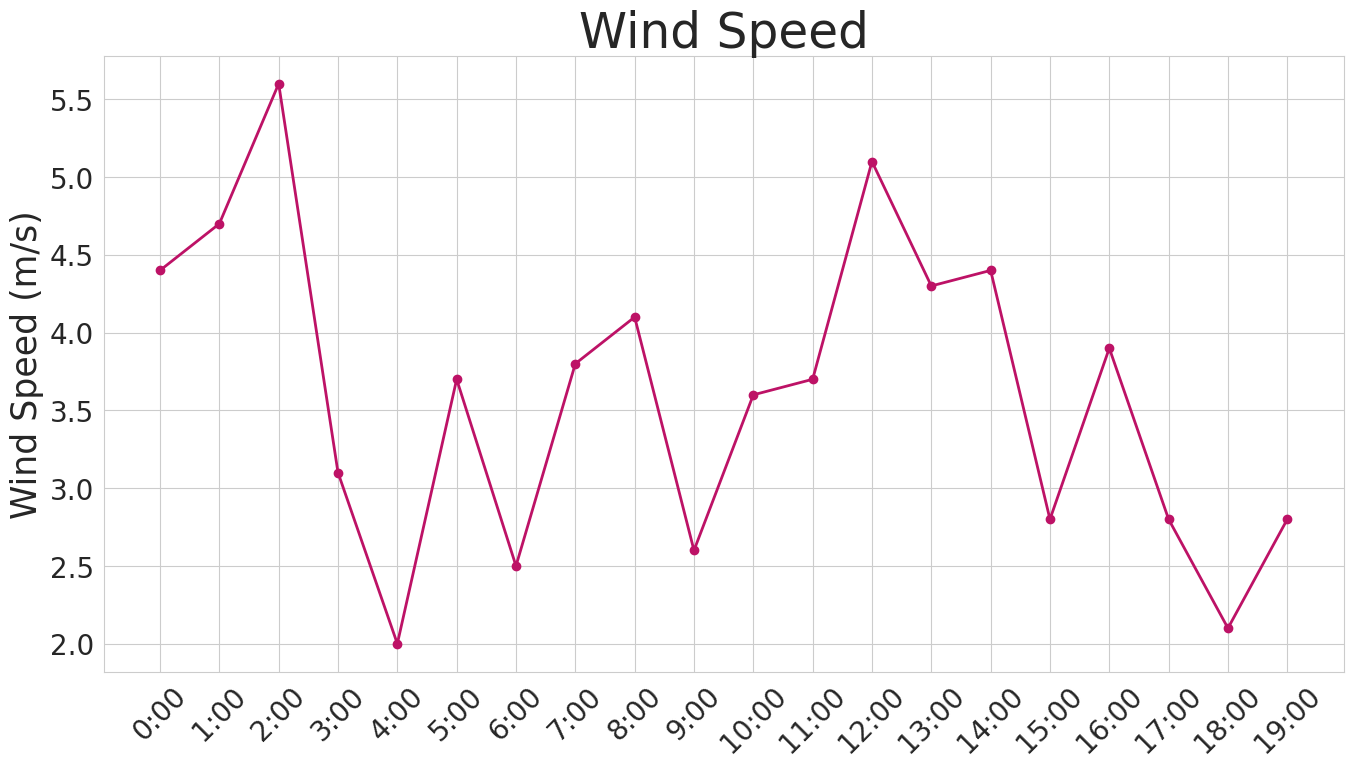

In [122]:
# Menampilkan grafik kecepatan udara 2013-03-01 pukul 00.00-19.00
wind_speed_graph(wind_speed_hour.head(20))

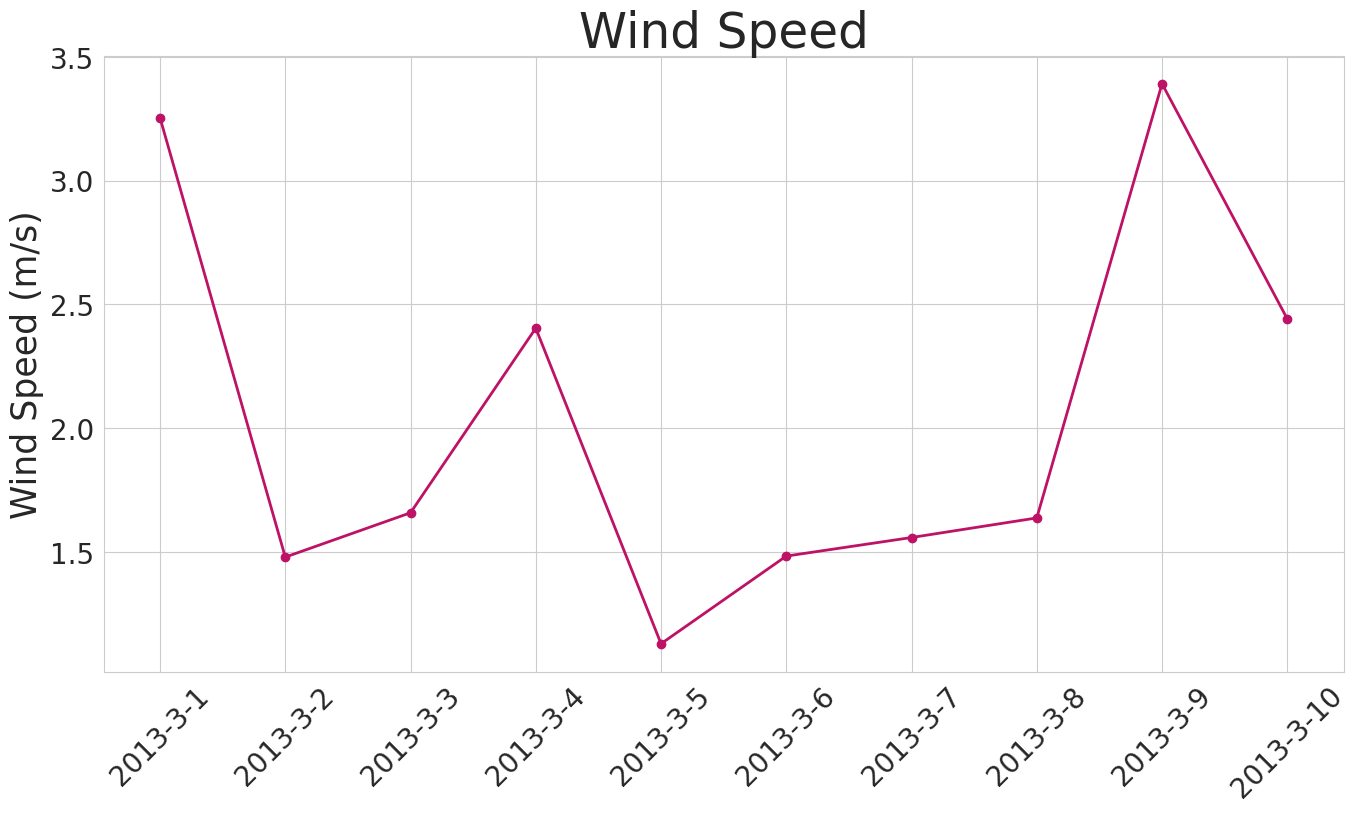

In [123]:
# Menampilkan grafik kecepatan udara 2013-03-01 sampai 2013-03-10
wind_speed_graph(wind_speed_day.head(10))

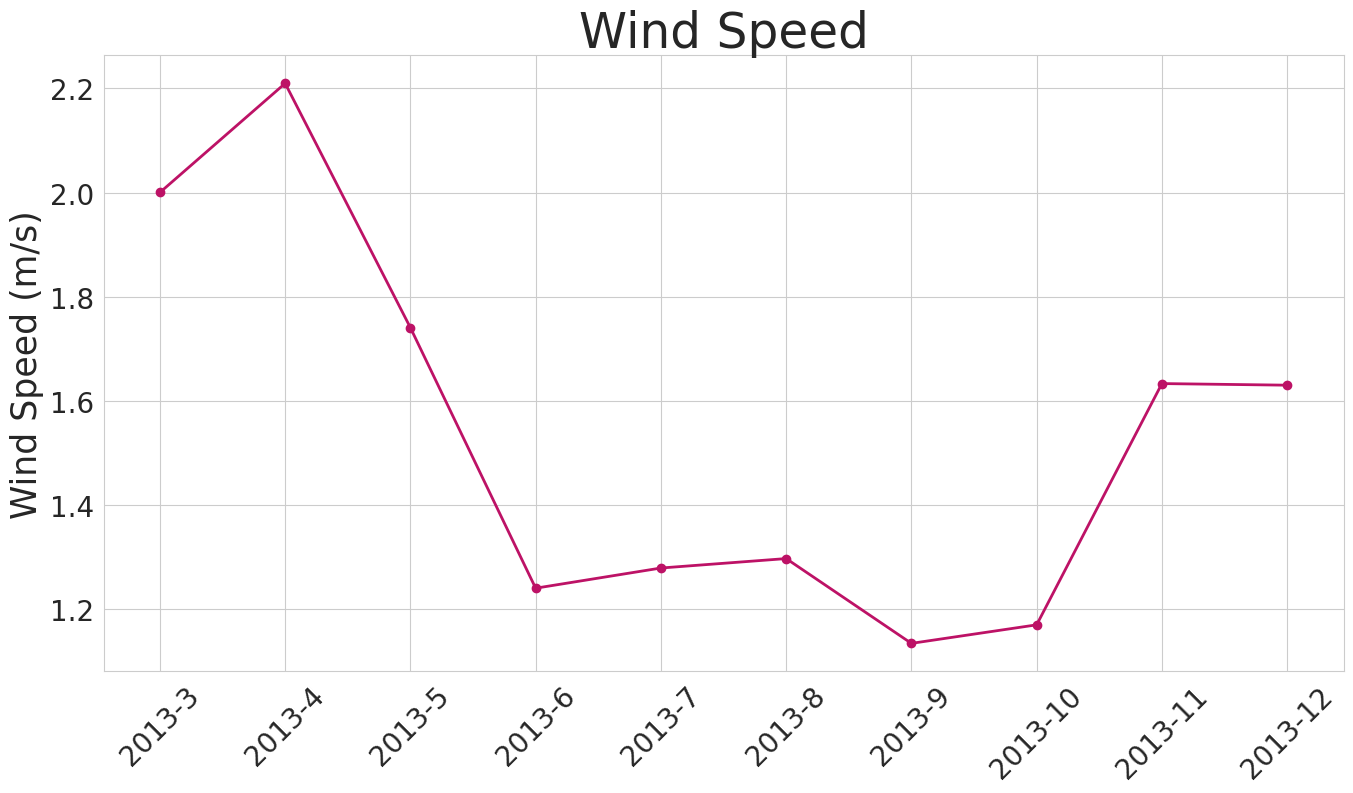

In [124]:
# Menampilkan grafik kecepatan udara 2013-03 sampai 2013-10
wind_speed_graph(wind_speed_month.head(10))

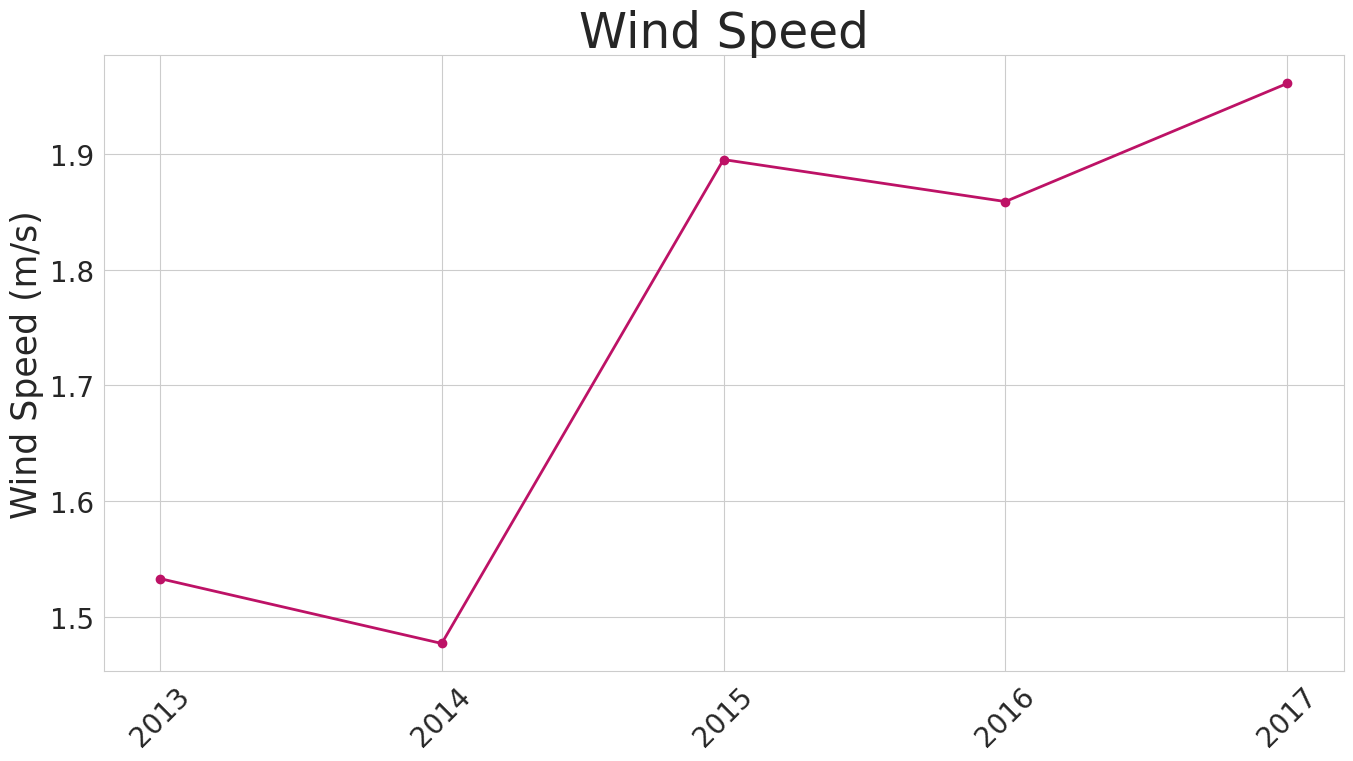

In [125]:
# Menampilkan grafik kecepatan udara 2013 sampai 2017
wind_speed_graph(wind_speed_year.head(5))

Selanjutnya juga ditunjukkan perhitungan rata-rata kecepatan udara dari masing-masing rentang waktu tersebut dengan fungsi windspeed_show().

In [88]:
def windspeed_show(df):
  mean = round(df['WSPM'].mean(), 2)
  print("Rata-rata kecepatan udara: ", str(mean)+ " m/s")

In [89]:
#  Rata-rata kecepatan udara pada 2013-03-01 pukul 00.00-19.00
print("2013-03-01 pukul 00.00-19.00 \n")
windspeed_show(wind_speed_hour.head(20))

2013-03-01 pukul 00.00-19.00 

Rata-rata kecepatan udara:  3.6 m/s


In [90]:
#  Rata-rata kecepatan udara pada 2013-03-01 sampai 2013-03-10
print("2013-03-01 sampai 2013-03-10 \n")
windspeed_show(wind_speed_day.head(10))

2013-03-01 sampai 2013-03-10 

Rata-rata kecepatan udara:  2.04 m/s


In [91]:
#  Rata-rata kecepatan udara pada 2013-03 sampai 2013-10
print("2013-03 sampai 2013-10 \n")
windspeed_show(wind_speed_month.head(10))

2013-03 sampai 2013-10 

Rata-rata kecepatan udara:  1.53 m/s


In [92]:
#  Rata-rata kecepatan udara pada 2013 sampai 2017
print("2013 sampai 2017 \n")
windspeed_show(wind_speed_year.head(5))

2013 sampai 2017 

Rata-rata kecepatan udara:  1.75 m/s


## Conclusion

- Trend tingkat polusi udara di Aotizhongxin cenderung berubah-ubah. Akan tetapi, nilai rata rata parameter tingkat polusi udara PM2.5 dan PM10  pada tahun 2013-2017 cenderung berada pada kondisi tidak sehat untuk PM2.5 dan sedang untuk PM10
- Trend perubahan suhu udara di Aotizhongxin cenderung berubah-ubah. Akan tetapi, nilai rata rata suhu udara pada tahun 2013-2017 menunjukkan suhu tertinggi dicapai saat tahun 2014. Sedangkan untuk trend perubahan tekanan udara tidak cenderung mengalami perubahan
- Tingkat polusi umumnya tidak berpengaruh terhadap perubahan suhu dan udara karna nilai korelasinya masih di antara -0,5 sampai 0,5. Akan tetapi nilai korelasi pearson antara O3 VS suhu mencapai 0,59. Sehingga kenaikan polusi O3 akan menyebabkan kenaikan suhu
- Berdasarkan data PM2.5 nilai partikulat paling banyak ketika rentang waktu 17.00-23.00 atau ketika evening. Sedangkan data PM10 menunjukkan nilai partikulat paling banyak ketika rentang waktu 00.00-05.00 atau ketika night.
- Pada tahun 2013-2017 arah angin cenderung ke arah NE (North east)
- Kecepatan angin cenderung berubah namun tidak signifikan. Kecepatan angin tertinggi terjadi saat tahun 2017.